In [1]:
#Importing relevant functions
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
%matplotlib inline


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wooldridge as woo
import math
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from fitter import Fitter
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from RegscorePy import *
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms

In [3]:
!pip install wooldridge

In [4]:
import wooldridge as woo
df = woo.data('wage2')

### The objective of the analysis is to build a regression model to understand the factors influencing monthly earnings (wage) based on various individual and socio-economic characteristics. The dataset includes information on several variables such as hours worked, IQ score, knowledge of the world of work score, education level, work experience, age, marital status, race, region of residence, urban/rural living, number of siblings, birth order, and parental education.

#### Following are the questions to be answered with the Model:

#### 1. Factors Affecting Earnings: Identify the impact of different variables on wage. Which factors contribute significantly to higher or lower wages?

#### 2. Educational Impact: Identify the relationship between education (educ) and earnings. Does a higher level of education result in higher wages?

#### 3. Experience and Tenure: Investigate how work experience (exper) and tenure with the current employer (tenure) correlate with wages. Are individuals with more experience or longer tenure generally paid more?

#### 4. Age and Wage: Examine the relationship between age and wages. Is there a positive correlation, indicating that older individuals earn higher wages?

#### 5. Marital Status and Family Background: Analyze the influence of marital status (married) and family background (sibs, brthord, meduc, feduc) on earnings. Do individuals from certain family structures or with specific parental education levels tend to earn more?

#### 6. Regional and Urban/Rural Impact: Investigate whether residing in the South (south) or in an urban area (urban) affects earnings. Are there regional or urban/rural wage disparities?

#### 7. Racial Disparities: Explore the impact of race (black) on earnings. Do racial factors contribute to differences in wages?

#### 8. Other Variables: Assess the impact of variables like IQ, knowledge of the world of work (KWW), and hours worked on earnings.

#### The source of the data is wooldridge as we had to pick a dataset that has at least 15-20 predictor variables and included quantitative and factor variables.

# Question 1

# Boruta Algorithm

In [5]:
# We run boruta on the quantitative predictors
indicator_vars_to_drop = ['married', 'black', 'south', 'urban']
data_without_indicators = df.drop(columns=indicator_vars_to_drop)
print(data_without_indicators)

     wage  hours   IQ  KWW  educ  exper  tenure  age  sibs  brthord  meduc  \
0     769     40   93   35    12     11       2   31     1      2.0    8.0   
1     808     50  119   41    18     11      16   37     1      NaN   14.0   
2     825     40  108   46    14     11       9   33     1      2.0   14.0   
3     650     40   96   32    12     13       7   32     4      3.0   12.0   
4     562     40   74   27    11     14       5   34    10      6.0    6.0   
..    ...    ...  ...  ...   ...    ...     ...  ...   ...      ...    ...   
930   520     40   79   28    16      6       1   30     0      1.0   11.0   
931  1202     40  102   32    13     10       3   31     7      7.0    8.0   
932   538     45   77   22    12     12      10   28     9      NaN    7.0   
933   873     44  109   25    12     12      12   28     1      1.0    NaN   
934  1000     40  107   32    12     17      18   35     5      1.0    NaN   

     feduc     lwage  
0      8.0  6.645091  
1     14.0  6.694

In [6]:
data_without_indicators.isnull().values.any()

True

In [7]:
#Checking if there is any Null Value

print(data_without_indicators.isnull().values.any())

#Count the number of many missing obs per variable (if any)
print(data_without_indicators.isnull().sum())

True
wage         0
hours        0
IQ           0
KWW          0
educ         0
exper        0
tenure       0
age          0
sibs         0
brthord     83
meduc       78
feduc      194
lwage        0
dtype: int64


### Imputing the null values by taking median for "Birth Order" and mean for "Mother's Education" and "Father's Education".

In [8]:
from numpy import nan
col_imputation = ['brthord','meduc','feduc']
for col in col_imputation:
    
    avg = data_without_indicators[col].astype('float').median(axis=0) if col == 'brthord' else data_without_indicators[col].astype('float').mean(axis=0)
    data_without_indicators[col].replace(np.nan, avg, inplace=True)

In [9]:
df1 = data_without_indicators
df1.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,2.0,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,10,6.0,6.0,11.0,6.331502


In [10]:
df1.isnull().values.any()

False

We have no null values now in the data frame.

In [90]:
pip install Boruta

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [43]:
import shap

In [44]:
pip uninstall BorutaShap -y

Note: you may need to restart the kernel to use updated packages.


In [45]:
!pip install shap
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, IsolationForest
from sklearn.datasets import load_breast_cancer, load_diabetes
from statsmodels.stats.multitest import multipletests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.sparse import issparse
from scipy.stats import binom_test, ks_2samp
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import random
import pandas as pd
import numpy as np
from numpy.random import choice
import seaborn as sns
import shap
import os
import re

import warnings
warnings.filterwarnings("ignore")

!pip install shap
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, IsolationForest
from sklearn.datasets import load_breast_cancer, load_diabetes
from statsmodels.stats.multitest import multipletests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.sparse import issparse
from scipy.stats import binom_test, ks_2samp
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import random
import pandas as pd
import numpy as np
from numpy.random import choice
import seaborn as sns
import shap
import os
import re

import warnings
warnings.filterwarnings("ignore")

class BorutaShap:

    """
    BorutaShap is a wrapper feature selection method built on the foundations of both the SHAP and Boruta algorithms.
    """

    def __init__(self, model=None, importance_measure='Shap',
                classification=True, percentile=100, pvalue=0.05):

        """
        Parameters
        ----------
        model: Model Object
            If no model specified then a base Random Forest will be returned otherwise the specifed model will
            be returned.
        importance_measure: String
            Which importance measure too use either Shap or Gini/Gain
        classification: Boolean
            if true then the problem is either a binary or multiclass problem otherwise if false then it is regression
        percentile: Int
            An integer ranging from 0-100 it changes the value of the max shadow importance values. Thus, lowering its value
            would make the algorithm more lenient.
        p_value: float
            A float used as a significance level again if the p-value is increased the algorithm will be more lenient making it smaller
            would make it more strict also by making the model more strict could impact runtime making it slower. As it will be less likley
            to reject and accept features.
        """

        self.importance_measure = importance_measure.lower()
        self.percentile = percentile
        self.pvalue = pvalue
        self.classification = classification
        self.model = model
        self.check_model()


    def check_model(self):

        """
        Checks that a model object has been passed as a parameter when intiializing the BorutaShap class.
        Returns
        -------
        Model Object
            If no model specified then a base Random Forest will be returned otherwise the specifed model will
            be returned.
        Raises
        ------
        AttirbuteError
             If the model object does not have the required attributes.
        """

        check_fit = hasattr(self.model, 'fit')
        check_predict_proba = hasattr(self.model, 'predict')

        try:
            check_feature_importance = hasattr(self.model, 'feature_importances_')

        except:
            check_feature_importance = True


        if self.model is None:

            if self.classification:
                self.model = RandomForestClassifier()
            else:
                self.model = RandomForestRegressor()

        elif check_fit is False and check_predict_proba is False:
            raise AttributeError('Model must contain both the fit() and predict() methods')

        elif check_feature_importance is False and self.importance_measure == 'gini':
            raise AttributeError('Model must contain the feature_importances_ method to use Gini try Shap instead')

        else:
            pass


    def check_X(self):

        """
        Checks that the data passed to the BorutaShap instance is a pandas Dataframe
        Returns
        -------
        Datframe
        Raises
        ------
        AttirbuteError
             If the data is not of the expected type.
        """

        if isinstance(self.X, pd.DataFrame) is False:
            raise AttributeError('X must be a pandas Dataframe')

        else:
            pass


    def missing_values_y(self):

        """
        Checks for missing values in target variable.
        Returns
        -------
        Boolean
        Raises
        ------
        AttirbuteError
             If data is not in the expected format.
        """

        if isinstance(self.y, pd.Series):
            return self.y.isnull().any().any()

        elif isinstance(self.y, np.ndarray):
            return np.isnan(self.y).any()

        else:
            raise AttributeError('Y must be a pandas Dataframe or a numpy array')


    def check_missing_values(self):

        """
        Checks for missing values in the data.
        Returns
        -------
        Boolean
        Raises
        ------
        AttirbuteError
             If there are missing values present.
        """

        X_missing = self.X.isnull().any().any()
        Y_missing = self.missing_values_y()

        models_to_check = ('xgb', 'catboost', 'lgbm', 'lightgbm')

        model_name = str(type(self.model)).lower()
        if X_missing or Y_missing:

            if any([x in model_name for x in models_to_check]):
                print('Warning there are missing values in your data !')

            else:
                raise ValueError('There are missing values in your Data')

        else:
            pass


    def Check_if_chose_train_or_test_and_train_model(self):

        """
        Decides to fit the model to either the training data or the test/unseen data a great discussion on the
        differences can be found here.
        https://compstat-lmu.github.io/iml_methods_limitations/pfi-data.html#introduction-to-test-vs.training-data
        """
        if self.stratify is not None and not self.classification:
            raise ValueError('Cannot take a strtified sample from continuous variable please bucket the variable and try again !')


        if self.train_or_test.lower() == 'test':
            # keeping the same naming convenetion as to not add complexit later on
            self.X_boruta_train, self.X_boruta_test, self.y_train, self.y_test, self.w_train, self.w_test = train_test_split(self.X_boruta,
                                                                                                                                self.y,
                                                                                                                                self.sample_weight,
                                                                                                                                test_size=0.3,
                                                                                                                                random_state=self.random_state,
                                                                                                                                stratify=self.stratify)
            self.Train_model(self.X_boruta_train, self.y_train, sample_weight = self.w_train)

        elif self.train_or_test.lower() == 'train':
            # model will be trained and evaluated on the same data
            self.Train_model(self.X_boruta, self.y, sample_weight = self.sample_weight)

        else:
            raise ValueError('The train_or_test parameter can only be "train" or "test"')



    def Train_model(self, X, y, sample_weight = None):

        """
        Trains Model also checks to see if the model is an instance of catboost as it needs extra parameters
        also the try except is for models with a verbose statement
        Parameters
        ----------
        X: Dataframe
            A pandas dataframe of the features.
        y: Series/ndarray
            A pandas series or numpy ndarray of the target
        sample_weight: Series/ndarray
            A pandas series or numpy ndarray of the sample weights
        Returns
        ----------
        fitted model object
        """

        if 'catboost' in str(type(self.model)).lower():
            self.model.fit(X, y, sample_weight = sample_weight, cat_features = self.X_categorical,  verbose=False)

        else:

            try:
                self.model.fit(X, y, sample_weight = sample_weight, verbose=False)

            except:
                self.model.fit(X, y, sample_weight = sample_weight)




    def fit(self, X, y, sample_weight = None, n_trials = 20, random_state=0, sample=False,
            train_or_test = 'test', normalize=True, verbose=True, stratify=None):

        """
        The main body of the program this method it computes the following
        1. Extend the information system by adding copies of all variables (the information system
        is always extended by at least 5 shadow attributes, even if the number of attributes in
        the original set is lower than 5).
        2. Shuffle the added attributes to remove their correlations with the response.
        3. Run a random forest classifier on the extended information system and gather the
        Z scores computed.
        4. Find the maximum Z score among shadow attributes (MZSA), and then assign a hit to
        every attribute that scored better than MZSA.
        5. For each attribute with undetermined importance perform a two-sided test of equality
        with the MZSA.
        6. Deem the attributes which have importance significantly lower than MZSA as ‘unimportant’
        and permanently remove them from the information system.
        7. Deem the attributes which have importance significantly higher than MZSA as ‘important’.
        8. Remove all shadow attributes.
        9. Repeat the procedure until the importance is assigned for all the attributes, or the
        algorithm has reached the previously set limit of the random forest runs.
        10. Stores results.
        Parameters
        ----------
        X: Dataframe
            A pandas dataframe of the features.
        y: Series/ndarray
            A pandas series or numpy ndarray of the target
        sample_weight: Series/ndarray
            A pandas series or numpy ndarray of the sample weight of the observations (optional)
        random_state: int
            A random state for reproducibility of results
        Sample: Boolean
            if true then a rowise sample of the data will be used to calculate the feature importance values
        sample_fraction: float
            The sample fraction of the original data used in calculating the feature importance values only
            used if Sample==True.
        train_or_test: string
            Decides whether the feature importance should be calculated on out of sample data see the dicussion here.
            https://compstat-lmu.github.io/iml_methods_limitations/pfi-data.html#introduction-to-test-vs.training-data
        normalize: boolean
            if true the importance values will be normalized using the z-score formula
        verbose: Boolean
            a flag indicator to print out all the rejected or accepted features.
        stratify: array
            allows the train test splits to be stratified based on given values.
        """

        if sample_weight is None:
            sample_weight = np.ones(len(X))
        np.random.seed(random_state)
        self.starting_X = X.copy()
        self.X = X.copy()
        self.y = y.copy()
        self.sample_weight = sample_weight.copy()
        self.n_trials = n_trials
        self.random_state = random_state
        self.ncols = self.X.shape[1]
        self.all_columns = self.X.columns.to_numpy()
        self.rejected_columns = []
        self.accepted_columns = []

        self.check_X()
        self.check_missing_values()
        self.sample = sample
        self.train_or_test = train_or_test
        self.stratify = stratify

        self.features_to_remove = []
        self.hits  = np.zeros(self.ncols)
        self.order = self.create_mapping_between_cols_and_indices()
        self.create_importance_history()

        if self.sample: self.preds = self.isolation_forest(self.X, self.sample_weight)

        for trial in tqdm(range(self.n_trials)):

            self.remove_features_if_rejected()
            self.columns = self.X.columns.to_numpy()
            self.create_shadow_features()

            # early stopping
            if self.X.shape[1] == 0:
                break

            else:

                self.Check_if_chose_train_or_test_and_train_model()

                self.X_feature_import, self.Shadow_feature_import = self.feature_importance(normalize=normalize)
                self.update_importance_history()
                hits = self.calculate_hits()
                self.hits += hits
                self.history_hits = np.vstack((self.history_hits, self.hits))
                self.test_features(iteration=trial+1)

        self.store_feature_importance()
        self.calculate_rejected_accepted_tentative(verbose=verbose)


    def calculate_rejected_accepted_tentative(self, verbose):

        """
        Figures out which features have been either accepted rejeected or tentative
        Returns
        -------
        3 lists
        """

        self.rejected  = list(set(self.flatten_list(self.rejected_columns))-set(self.flatten_list(self.accepted_columns)))
        self.accepted  = list(set(self.flatten_list(self.accepted_columns)))
        self.tentative = list(set(self.all_columns) - set(self.rejected + self.accepted))

        if verbose:
            print(str(len(self.accepted))  + ' attributes confirmed important: ' + str(self.accepted))
            print(str(len(self.rejected))  + ' attributes confirmed unimportant: ' + str(self.rejected))
            print(str(len(self.tentative)) + ' tentative attributes remains: ' + str(self.tentative))



    def create_importance_history(self):

        """
        Creates a dataframe object to store historical feature importance scores.
        Returns
        -------
        Datframe
        """

        self.history_shadow = np.zeros(self.ncols)
        self.history_x = np.zeros(self.ncols)
        self.history_hits = np.zeros(self.ncols)


    def update_importance_history(self):

        """
        At each iteration update the datframe object that stores the historical feature importance scores.
        Returns
        -------
        Datframe
        """

        padded_history_shadow  = np.full((self.ncols), np.NaN)
        padded_history_x = np.full((self.ncols), np.NaN)

        for (index, col) in enumerate(self.columns):
            map_index = self.order[col]
            padded_history_shadow[map_index] = self.Shadow_feature_import[index]
            padded_history_x[map_index] = self.X_feature_import[index]

        self.history_shadow = np.vstack((self.history_shadow, padded_history_shadow))
        self.history_x = np.vstack((self.history_x, padded_history_x))



    def store_feature_importance(self):

        """
        Reshapes the columns in the historical feature importance scores object also adds the mean, median, max, min
        shadow feature scores.
        Returns
        -------
        Datframe
        """

        self.history_x = pd.DataFrame(data=self.history_x,
                                 columns=self.all_columns)


        self.history_x['Max_Shadow']    =  [max(i) for i in self.history_shadow]
        self.history_x['Min_Shadow']    =  [min(i) for i in self.history_shadow]
        self.history_x['Mean_Shadow']   =  [np.nanmean(i) for i in self.history_shadow]
        self.history_x['Median_Shadow'] =  [np.nanmedian(i) for i in self.history_shadow]


    def results_to_csv(self, filename='feature_importance'):

        """
        Saves the historical feature importance scores to csv.
        Parameters
        ----------
        filname : string
            used as the name for the outputed file.
        Returns
        -------
        comma delimnated file
        """

        features = pd.DataFrame(data={'Features':self.history_x.iloc[1:].columns.values,
        'Average Feature Importance':self.history_x.iloc[1:].mean(axis=0).values,
        'Standard Deviation Importance':self.history_x.iloc[1:].std(axis=0).values})

        decision_mapper = self.create_mapping_of_features_to_attribute(maps=['Tentative','Rejected','Accepted', 'Shadow'])
        features['Decision'] = features['Features'].map(decision_mapper)
        features = features.sort_values(by='Average Feature Importance',ascending=False)

        features.to_csv(filename + '.csv', index=False)


    def remove_features_if_rejected(self):

        """
        At each iteration if a feature has been rejected by the algorithm remove it from the process
        """

        if len(self.features_to_remove) != 0:
            for feature in self.features_to_remove:
                try:
                    self.X.drop(feature, axis = 1, inplace=True)
                except:
                    pass

        else:
            pass


    @staticmethod
    def average_of_list(lst):
        return sum(lst) / len(lst)

    @staticmethod
    def flatten_list(array):
        return [item for sublist in array for item in sublist]


    def create_mapping_between_cols_and_indices(self):
        return dict(zip(self.X.columns.to_list(), np.arange(self.X.shape[1])))


    def calculate_hits(self):

        """
        If a features importance is greater than the maximum importance value of all the random shadow
        features then we assign it a hit.
        Parameters
        ----------
        Percentile : value ranging from 0-1
            can be used to reduce value of the maximum value of the shadow features making the algorithm
            more lenient.
        """

        shadow_threshold = np.percentile(self.Shadow_feature_import,
                                        self.percentile)

        padded_hits = np.zeros(self.ncols)
        hits = self.X_feature_import > shadow_threshold

        for (index, col) in enumerate(self.columns):
            map_index = self.order[col]
            padded_hits[map_index] += hits[index]

        return padded_hits


    def create_shadow_features(self):
        """
        Creates the random shadow features by shuffling the existing columns.
        Returns:
            Datframe with random permutations of the original columns.
        """
        self.X_shadow = self.X.apply(np.random.permutation)

        if isinstance(self.X_shadow, pd.DataFrame):
            # append
            obj_col = self.X_shadow.select_dtypes("object").columns.tolist()
            if obj_col ==[] :
                 pass
            else :
                 self.X_shadow[obj_col] =self.X_shadow[obj_col].astype("category")

        self.X_shadow.columns = ['shadow_' + feature for feature in self.X.columns]
        self.X_boruta = pd.concat([self.X, self.X_shadow], axis = 1)

        col_types = self.X_boruta.dtypes
        self.X_categorical = list(col_types[(col_types=='category' ) | (col_types=='object')].index)


    @staticmethod
    def calculate_Zscore(array):
        """
        Calculates the Z-score of an array
        Parameters
         ----------
        array: array_like
        Returns:
            normalised array
        """
        mean_value = np.mean(array)
        std_value  = np.std(array)
        return [(element-mean_value)/std_value for element in array]


    def feature_importance(self, normalize):

        """
        Caculates the feature importances scores of the model
        Parameters
        ----------
        importance_measure: string
            allows the user to choose either the Shap or Gini importance metrics
        normalize: boolean
            if true the importance values will be normalized using the z-score formula
        Returns:
            array of normalized feature importance scores for both the shadow and original features.
        Raise
        ----------
            ValueError:
                If no Importance measure was specified
        """

        if self.importance_measure == 'shap':

            self.explain()
            vals = self.shap_values

            if normalize:
                vals = self.calculate_Zscore(vals)

            X_feature_import = vals[:len(self.X.columns)]
            Shadow_feature_import = vals[len(self.X_shadow.columns):]


        elif self.importance_measure == 'gini':

                feature_importances_ =  np.abs(self.model.feature_importances_)

                if normalize:
                    feature_importances_ = self.calculate_Zscore(feature_importances_)

                X_feature_import = feature_importances_[:len(self.X.columns)]
                Shadow_feature_import = feature_importances_[len(self.X.columns):]

        else:

            raise ValueError('No Importance_measure was specified select one of (shap, gini)')


        return X_feature_import, Shadow_feature_import


    @staticmethod
    def isolation_forest(X, sample_weight):
        '''
        fits isloation forest to the dataset and gives an anomally score to every sample
        '''
        clf = IsolationForest().fit(X, sample_weight = sample_weight)
        preds = clf.score_samples(X)
        return preds


    @staticmethod
    def get_5_percent(num):
        return round(5  / 100 * num)


    def get_5_percent_splits(self, length):
        '''
        splits dataframe into 5% intervals
        '''
        five_percent = self.get_5_percent(length)
        return np.arange(five_percent,length,five_percent)



    def find_sample(self):
        '''
        Finds a sample by comparing the distributions of the anomally scores between the sample and the original
        distribution using the KS-test. Starts of a 5% howver will increase to 10% and then 15% etc. if a significant sample can not be found
        '''
        loop = True
        iteration = 0
        size = self.get_5_percent_splits(self.X.shape[0])
        element = 1
        while loop:

            sample_indices = choice(np.arange(self.preds.size),  size=size[element], replace=False)
            sample = np.take(self.preds, sample_indices)
            if ks_2samp(self.preds, sample).pvalue > 0.95:
                break

            if iteration == 20:
                element  += 1
                iteration = 0


        return self.X_boruta.iloc[sample_indices]



    def explain(self):

        """
        The shap package has numerous variants of explainers which use different assumptions depending on the model
        type this function allows the user to choose explainer
        Returns:
            shap values
        Raise
        ----------
            ValueError:
                if no model type has been specified tree as default
        """


        explainer = shap.TreeExplainer(self.model, 
                                       feature_perturbation = "tree_path_dependent",
                                       approximate = True)


        if self.sample:


            if self.classification:
                # for some reason shap returns values wraped in a list of length 1

                self.shap_values = np.array(explainer.shap_values(self.find_sample()))
                if isinstance(self.shap_values, list):

                    class_inds = range(len(self.shap_values))
                    shap_imp = np.zeros(self.shap_values[0].shape[1])
                    for i, ind in enumerate(class_inds):
                        shap_imp += np.abs(self.shap_values[ind]).mean(0)
                    self.shap_values /= len(self.shap_values)

                elif len(self.shap_values.shape) == 3:
                    self.shap_values = np.abs(self.shap_values).sum(axis=0)
                    self.shap_values = self.shap_values.mean(0)

                else:
                    self.shap_values = np.abs(self.shap_values).mean(0)

            else:
                self.shap_values = explainer.shap_values(self.find_sample())
                self.shap_values = np.abs(self.shap_values).mean(0)

        else:

            if self.classification:
                # for some reason shap returns values wraped in a list of length 1
                self.shap_values = np.array(explainer.shap_values(self.X_boruta))
                if isinstance(self.shap_values, list):

                    class_inds = range(len(self.shap_values))
                    shap_imp = np.zeros(self.shap_values[0].shape[1])
                    for i, ind in enumerate(class_inds):
                        shap_imp += np.abs(self.shap_values[ind]).mean(0)
                    self.shap_values /= len(self.shap_values)

                elif len(self.shap_values.shape) == 3:
                    self.shap_values = np.abs(self.shap_values).sum(axis=0)
                    self.shap_values = self.shap_values.mean(0)

                else:
                    self.shap_values = np.abs(self.shap_values).mean(0)

            else:
                self.shap_values = explainer.shap_values(self.X_boruta)
                self.shap_values = np.abs(self.shap_values).mean(0)



    @staticmethod
    def binomial_H0_test(array, n, p, alternative):
        """
        Perform a test that the probability of success is p.
        This is an exact, two-sided test of the null hypothesis
        that the probability of success in a Bernoulli experiment is p
        """
        return [binom_test(x, n=n, p=p, alternative=alternative) for x in array]


    @staticmethod
    def symetric_difference_between_two_arrays(array_one, array_two):
        set_one = set(array_one)
        set_two = set(array_two)
        return np.array(list(set_one.symmetric_difference(set_two)))


    @staticmethod
    def find_index_of_true_in_array(array):
        length = len(array)
        return list(filter(lambda x: array[x], range(length)))


    @staticmethod
    def bonferoni_corrections(pvals, alpha=0.05, n_tests=None):
        """
        used to counteract the problem of multiple comparisons.
        """
        pvals = np.array(pvals)

        if n_tests is None:
            n_tests = len(pvals)
        else:
            pass

        alphacBon = alpha / float(n_tests)
        reject = pvals <= alphacBon
        pvals_corrected = pvals * float(n_tests)
        return reject, pvals_corrected


    def test_features(self, iteration):

        """
        For each feature with an undetermined importance perform a two-sided test of equality
        with the maximum shadow value to determine if it is statistcally better
        Parameters
        ----------
        hits: an array which holds the history of the number times
              this feature was better than the maximum shadow
        Returns:
            Two arrays of the names of the accepted and rejected columns at that instance
        """

        acceptance_p_values = self.binomial_H0_test(self.hits,
                                                    n=iteration,
                                                    p=0.5,
                                                    alternative='greater')

        regect_p_values = self.binomial_H0_test(self.hits,
                                                n=iteration,
                                                p=0.5,
                                                alternative='less')

        # [1] as function returns a tuple
        modified_acceptance_p_values = self.bonferoni_corrections(acceptance_p_values,
                                                                  alpha=0.05,
                                                                  n_tests=len(self.columns))[1]

        modified_regect_p_values = self.bonferoni_corrections(regect_p_values,
                                                              alpha=0.05,
                                                              n_tests=len(self.columns))[1]

        # Take the inverse as we want true to keep featrues
        rejected_columns = np.array(modified_regect_p_values) < self.pvalue
        accepted_columns = np.array(modified_acceptance_p_values) < self.pvalue

        rejected_indices = self.find_index_of_true_in_array(rejected_columns)
        accepted_indices = self.find_index_of_true_in_array(accepted_columns)

        rejected_features = self.all_columns[rejected_indices]
        accepted_features = self.all_columns[accepted_indices]


        self.features_to_remove = rejected_features


        self.rejected_columns.append(rejected_features)
        self.accepted_columns.append(accepted_features)


    def TentativeRoughFix(self):

        """
        Sometimes no matter how many iterations are run a feature may neither be rejected or
        accepted. This method is used in this case to make a decision on a tentative feature
        by comparing its median importance value with the median max shadow value.
        Parameters
        ----------
        tentative: an array which holds the names of the tentative attiributes.
        Returns:
            Two arrays of the names of the final decision of the accepted and rejected columns.
        """

        median_tentaive_values = self.history_x[self.tentative].median(axis=0).values
        median_max_shadow = self.history_x['Max_Shadow'].median(axis=0)


        filtered = median_tentaive_values > median_max_shadow

        self.tentative = np.array(self.tentative)
        newly_accepted = self.tentative[filtered]

        if len(newly_accepted) < 1:
            newly_rejected = self.tentative

        else:
            newly_rejected = self.symetric_difference_between_two_arrays(newly_accepted, self.tentative)

        print(str(len(newly_accepted)) + ' tentative features are now accepted: ' + str(newly_accepted))
        print(str(len(newly_rejected)) + ' tentative features are now rejected: ' + str(newly_rejected))

        self.rejected = self.rejected + newly_rejected.tolist()
        self.accepted = self.accepted + newly_accepted.tolist()



    def Subset(self, tentative=False):
        """
        Returns the subset of desired features
        """
        if tentative:
            return self.starting_X[self.accepted + self.tentative.tolist()]
        else:
            return self.starting_X[self.accepted]


    @staticmethod
    def create_list(array, color):
        colors = [color for x in range(len(array))]
        return colors

    @staticmethod
    def filter_data(data, column, value):
        data = data.copy()
        return data.loc[(data[column] == value) | (data[column] == 'Shadow')]


    @staticmethod
    def hasNumbers(inputString):
        return any(char.isdigit() for char in inputString)


    @staticmethod
    def check_if_which_features_is_correct(my_string):

        my_string = str(my_string).lower()
        if my_string in ['tentative','rejected','accepted','all']:
            pass

        else:
            raise ValueError(my_string + " is not a valid value did you mean to type 'all', 'tentative', 'accepted' or 'rejected' ?")



    def plot(self, X_rotation=90, X_size=8, figsize=(12,8),
            y_scale='log', which_features='all', display=True):

        """
        creates a boxplot of the feature importances
        Parameters
        ----------
        X_rotation: int
            Controls the orientation angle of the tick labels on the X-axis
        X_size: int
            Controls the font size of the tick labels
        y_scale: string
            Log transform of the y axis scale as hard to see the plot as it is normally dominated by two or three
            features.
        which_features: string
            Despite efforts if the number of columns is large the plot becomes cluttered so this parameter allows you to
            select subsets of the features like the accepted, rejected or tentative features default is all.
        Display: Boolean
        controls if the output is displayed or not, set to false when running test scripts
        """
        # data from wide to long
        data = self.history_x.iloc[1:]
        data['index'] = data.index
        data = pd.melt(data, id_vars='index', var_name='Methods')

        decision_mapper = self.create_mapping_of_features_to_attribute(maps=['Tentative','Rejected','Accepted', 'Shadow'])
        data['Decision'] = data['Methods'].map(decision_mapper)
        data.drop(['index'], axis=1, inplace=True)


        options = { 'accepted' : self.filter_data(data,'Decision', 'Accepted'),
                    'tentative': self.filter_data(data,'Decision', 'Tentative'),
                    'rejected' : self.filter_data(data,'Decision', 'Rejected'),
                    'all' : data
                    }

        self.check_if_which_features_is_correct(which_features)
        data = options[which_features.lower()]

        self.box_plot(data=data,
                      X_rotation=X_rotation,
                      X_size=X_size,
                      y_scale=y_scale,
                      figsize=figsize)
        if display:
            plt.show()
        else:
            plt.close()


    def box_plot(self, data, X_rotation, X_size, y_scale, figsize):

        if y_scale=='log':
            minimum = data['value'].min()
            if minimum <= 0:
                data['value'] += abs(minimum) + 0.01

        order = data.groupby(by=["Methods"])["value"].mean().sort_values(ascending=False).index
        my_palette = self.create_mapping_of_features_to_attribute(maps= ['yellow','red','green','blue'])

        # Use a color palette
        plt.figure(figsize=figsize)
        ax = sns.boxplot(x=data["Methods"], y=data["value"],
                        order=order, palette=my_palette)

        if y_scale == 'log':ax.set(yscale="log")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=X_rotation, size=X_size)
        ax.set_title('Feature Importance')
        ax.set_ylabel('Z-Score')
        ax.set_xlabel('Features')


    def create_mapping_of_features_to_attribute(self, maps = []):

        rejected = list(self.rejected)
        tentative = list(self.tentative)
        accepted = list(self.accepted)
        shadow = ['Max_Shadow','Median_Shadow','Min_Shadow','Mean_Shadow']

        tentative_map = self.create_list(tentative, maps[0])
        rejected_map  = self.create_list(rejected, maps[1])
        accepted_map  = self.create_list(accepted, maps[2])
        shadow_map = self.create_list(shadow, maps[3])

        values = tentative_map + rejected_map + accepted_map + shadow_map
        keys = tentative + rejected + accepted + shadow

        return self.to_dictionary(keys, values)


    @staticmethod
    def to_dictionary(list_one, list_two):
        return dict(zip(list_one, list_two))

    def load_data(data_type='classification'):

        """
        Load Example datasets for the user to try out the package
        """

        data_type = data_type.lower()

        if data_type == 'classification':
            cancer = load_breast_cancer()
            X = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
            y = X.pop('target')

        elif data_type == 'regression':
            diabetes = load_diabetes()
            X = pd.DataFrame(np.c_[diabetes['data'], diabetes['target']], columns = np.append(diabetes['feature_names'], ['target']))
            y = X.pop('target')

        else:
            raise ValueError("No data_type was specified, use either 'classification' or 'regression'")


        return X, y


In [46]:
x = df1.drop(columns=['wage','lwage'])
y = df1['wage']

We drop the dependent variable and its log transformation. 

  0%|          | 0/30 [00:00<?, ?it/s]

5 attributes confirmed important: ['educ', 'tenure', 'KWW', 'hours', 'IQ']
4 attributes confirmed unimportant: ['feduc', 'age', 'sibs', 'brthord']
2 tentative attributes remains: ['exper', 'meduc']


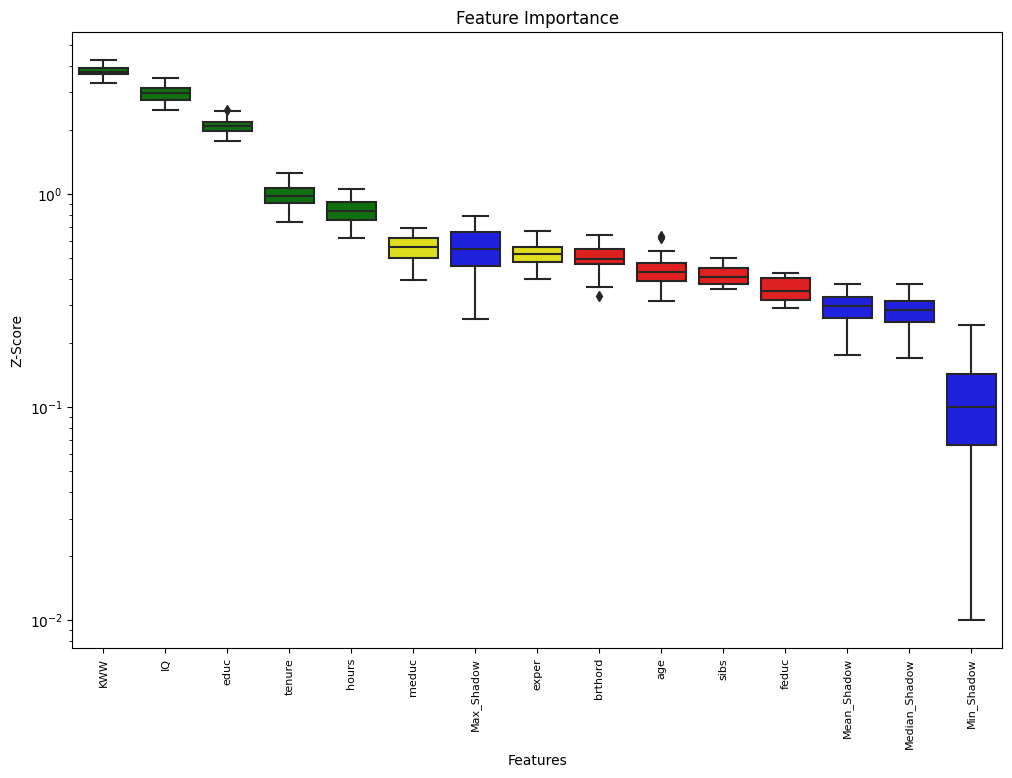

In [47]:
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=30, random_state=0)
Feature_Selector.plot(which_features='all')

## The importanat variables according to Boruta Algorithm are: Hours, Education, KWW, Tenure and IQ.

In [91]:
Feature_Selector.Subset()

,educ,tenure,KWW,hours,IQ
0,12,2,35,40,93
1,18,16,41,50,119
2,14,9,46,40,108
3,12,7,32,40,96
4,11,5,27,40,74
...,...,...,...,...,...
930,16,1,28,40,79
931,13,3,32,40,102
932,12,10,22,45,77
933,12,12,25,44,109


# Multiple Regression

### For the rest of the indicator variables, we compare the p-values after running the regression.

In [11]:
quantitative_vars_to_drop = ['hours','IQ','KWW' ,'educ' ,'exper','tenure','age' ,'sibs' ,'lwage','brthord', 'meduc','feduc']
data_without_quantitative = df.drop(columns=quantitative_vars_to_drop)
print(data_without_quantitative)

     wage  married  black  south  urban
0     769        1      0      0      1
1     808        1      0      0      1
2     825        1      0      0      1
3     650        1      0      0      1
4     562        1      0      0      1
..    ...      ...    ...    ...    ...
930   520        1      1      1      0
931  1202        1      0      1      1
932   538        1      1      1      0
933   873        1      0      1      0
934  1000        1      0      1      0

[935 rows x 5 columns]


In [12]:
print(data_without_quantitative.isnull().values.any())

#Counting the number of many missing obs per variable 
print(data_without_quantitative.isnull().sum())

False
wage       0
married    0
black      0
south      0
urban      0
dtype: int64


In [13]:
df_indicator= data_without_quantitative
df_indicator.head()

,wage,married,black,south,urban
0,769,1,0,0,1
1,808,1,0,0,1
2,825,1,0,0,1
3,650,1,0,0,1
4,562,1,0,0,1


In [14]:
# Specifying the Model
mr_mod = smf.ols(formula='wage ~ south+married+black+urban ', data=df_indicator)

mr_fit = mr_mod.fit()
print(mr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     30.52
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           6.82e-24
Time:                        16:26:41   Log-Likelihood:                -6880.7
No. Observations:                 935   AIC:                         1.377e+04
Df Residuals:                     930   BIC:                         1.380e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    722.3642     45.002     16.052      0.0

### We take all our indicator variables into the model as p-values are less than 0.05.

## Therefore, the important variables are: Hours, IQ, KWW, Tenure, Education, Married, Black, South and Urban.

In [15]:
df_final= df.drop(['exper','age','sibs','lwage','brthord', 'meduc','feduc'], axis=1)  
df_final.head()

,wage,hours,IQ,KWW,educ,tenure,married,black,south,urban
0,769,40,93,35,12,2,1,0,0,1
1,808,50,119,41,18,16,1,0,0,1
2,825,40,108,46,14,9,1,0,0,1
3,650,40,96,32,12,7,1,0,0,1
4,562,40,74,27,11,5,1,0,0,1


# Question 2

# Descriptive Analysis

In [16]:
print(df_final.isnull().values.any())

False


In [17]:
df_final.shape

(935, 10)

In [18]:
#Part 1: Summary Statistics

df_final.describe()

,wage,hours,IQ,KWW,educ,tenure,married,black,south,urban
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,957.945455,43.929412,101.282353,35.744385,13.468449,7.234225,0.893048,0.128342,0.341176,0.717647
std,404.360822,7.224256,15.052636,7.638788,2.196654,5.075206,0.309217,0.334650,0.474358,0.450385
min,115.000000,20.000000,50.000000,12.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,669.000000,40.000000,92.000000,31.000000,12.000000,3.000000,1.000000,0.000000,0.000000,0.000000
50%,905.000000,40.000000,102.000000,37.000000,12.000000,7.000000,1.000000,0.000000,0.000000,1.000000
75%,1160.000000,48.000000,112.000000,41.000000,16.000000,11.000000,1.000000,0.000000,1.000000,1.000000
max,3078.000000,80.000000,145.000000,56.000000,18.000000,22.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'wage'}>,
        <Axes: title={'center': 'hours'}>,
        <Axes: title={'center': 'IQ'}>],
       [<Axes: title={'center': 'KWW'}>,
        <Axes: title={'center': 'educ'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'married'}>,
        <Axes: title={'center': 'black'}>,
        <Axes: title={'center': 'south'}>],
       [<Axes: title={'center': 'urban'}>, <Axes: >, <Axes: >]],
      dtype=object)

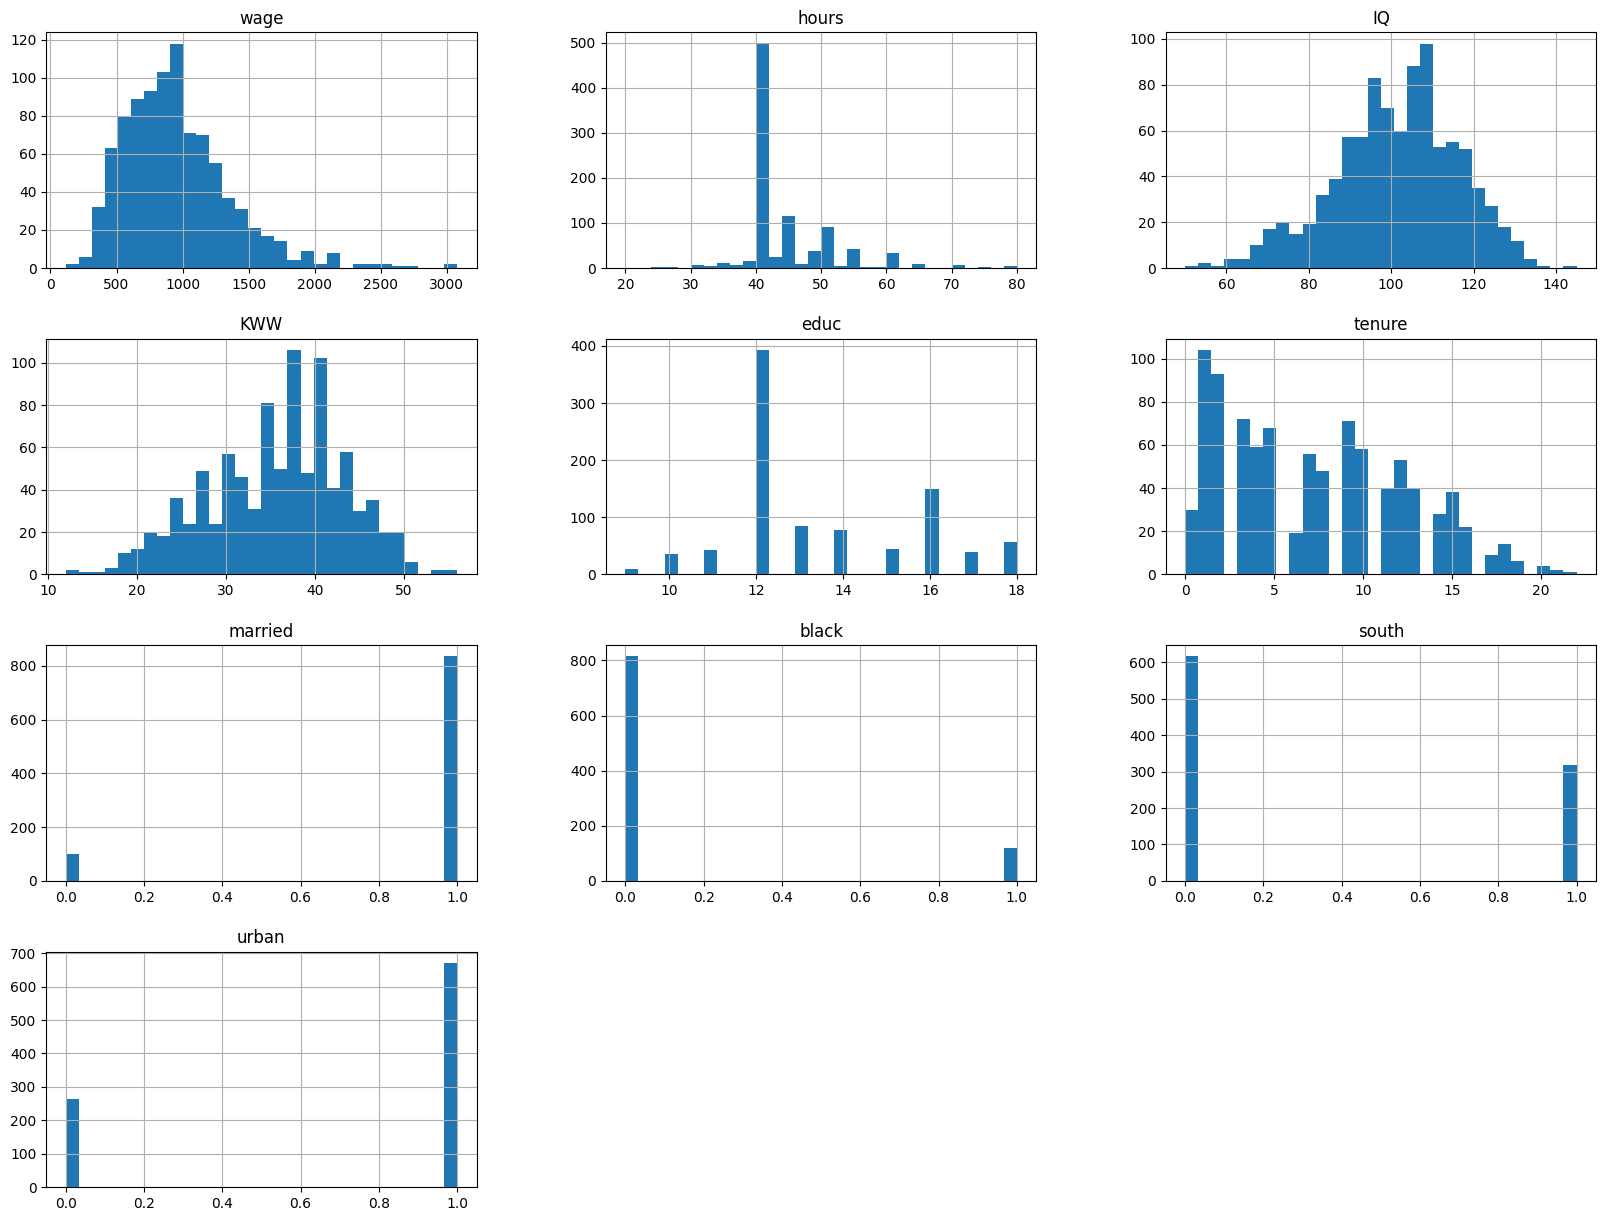

In [19]:
#Part 2: Plotting Histograms

df_final.hist(bins=30, figsize=(20, 15))

In [20]:
import scipy.stats as stats

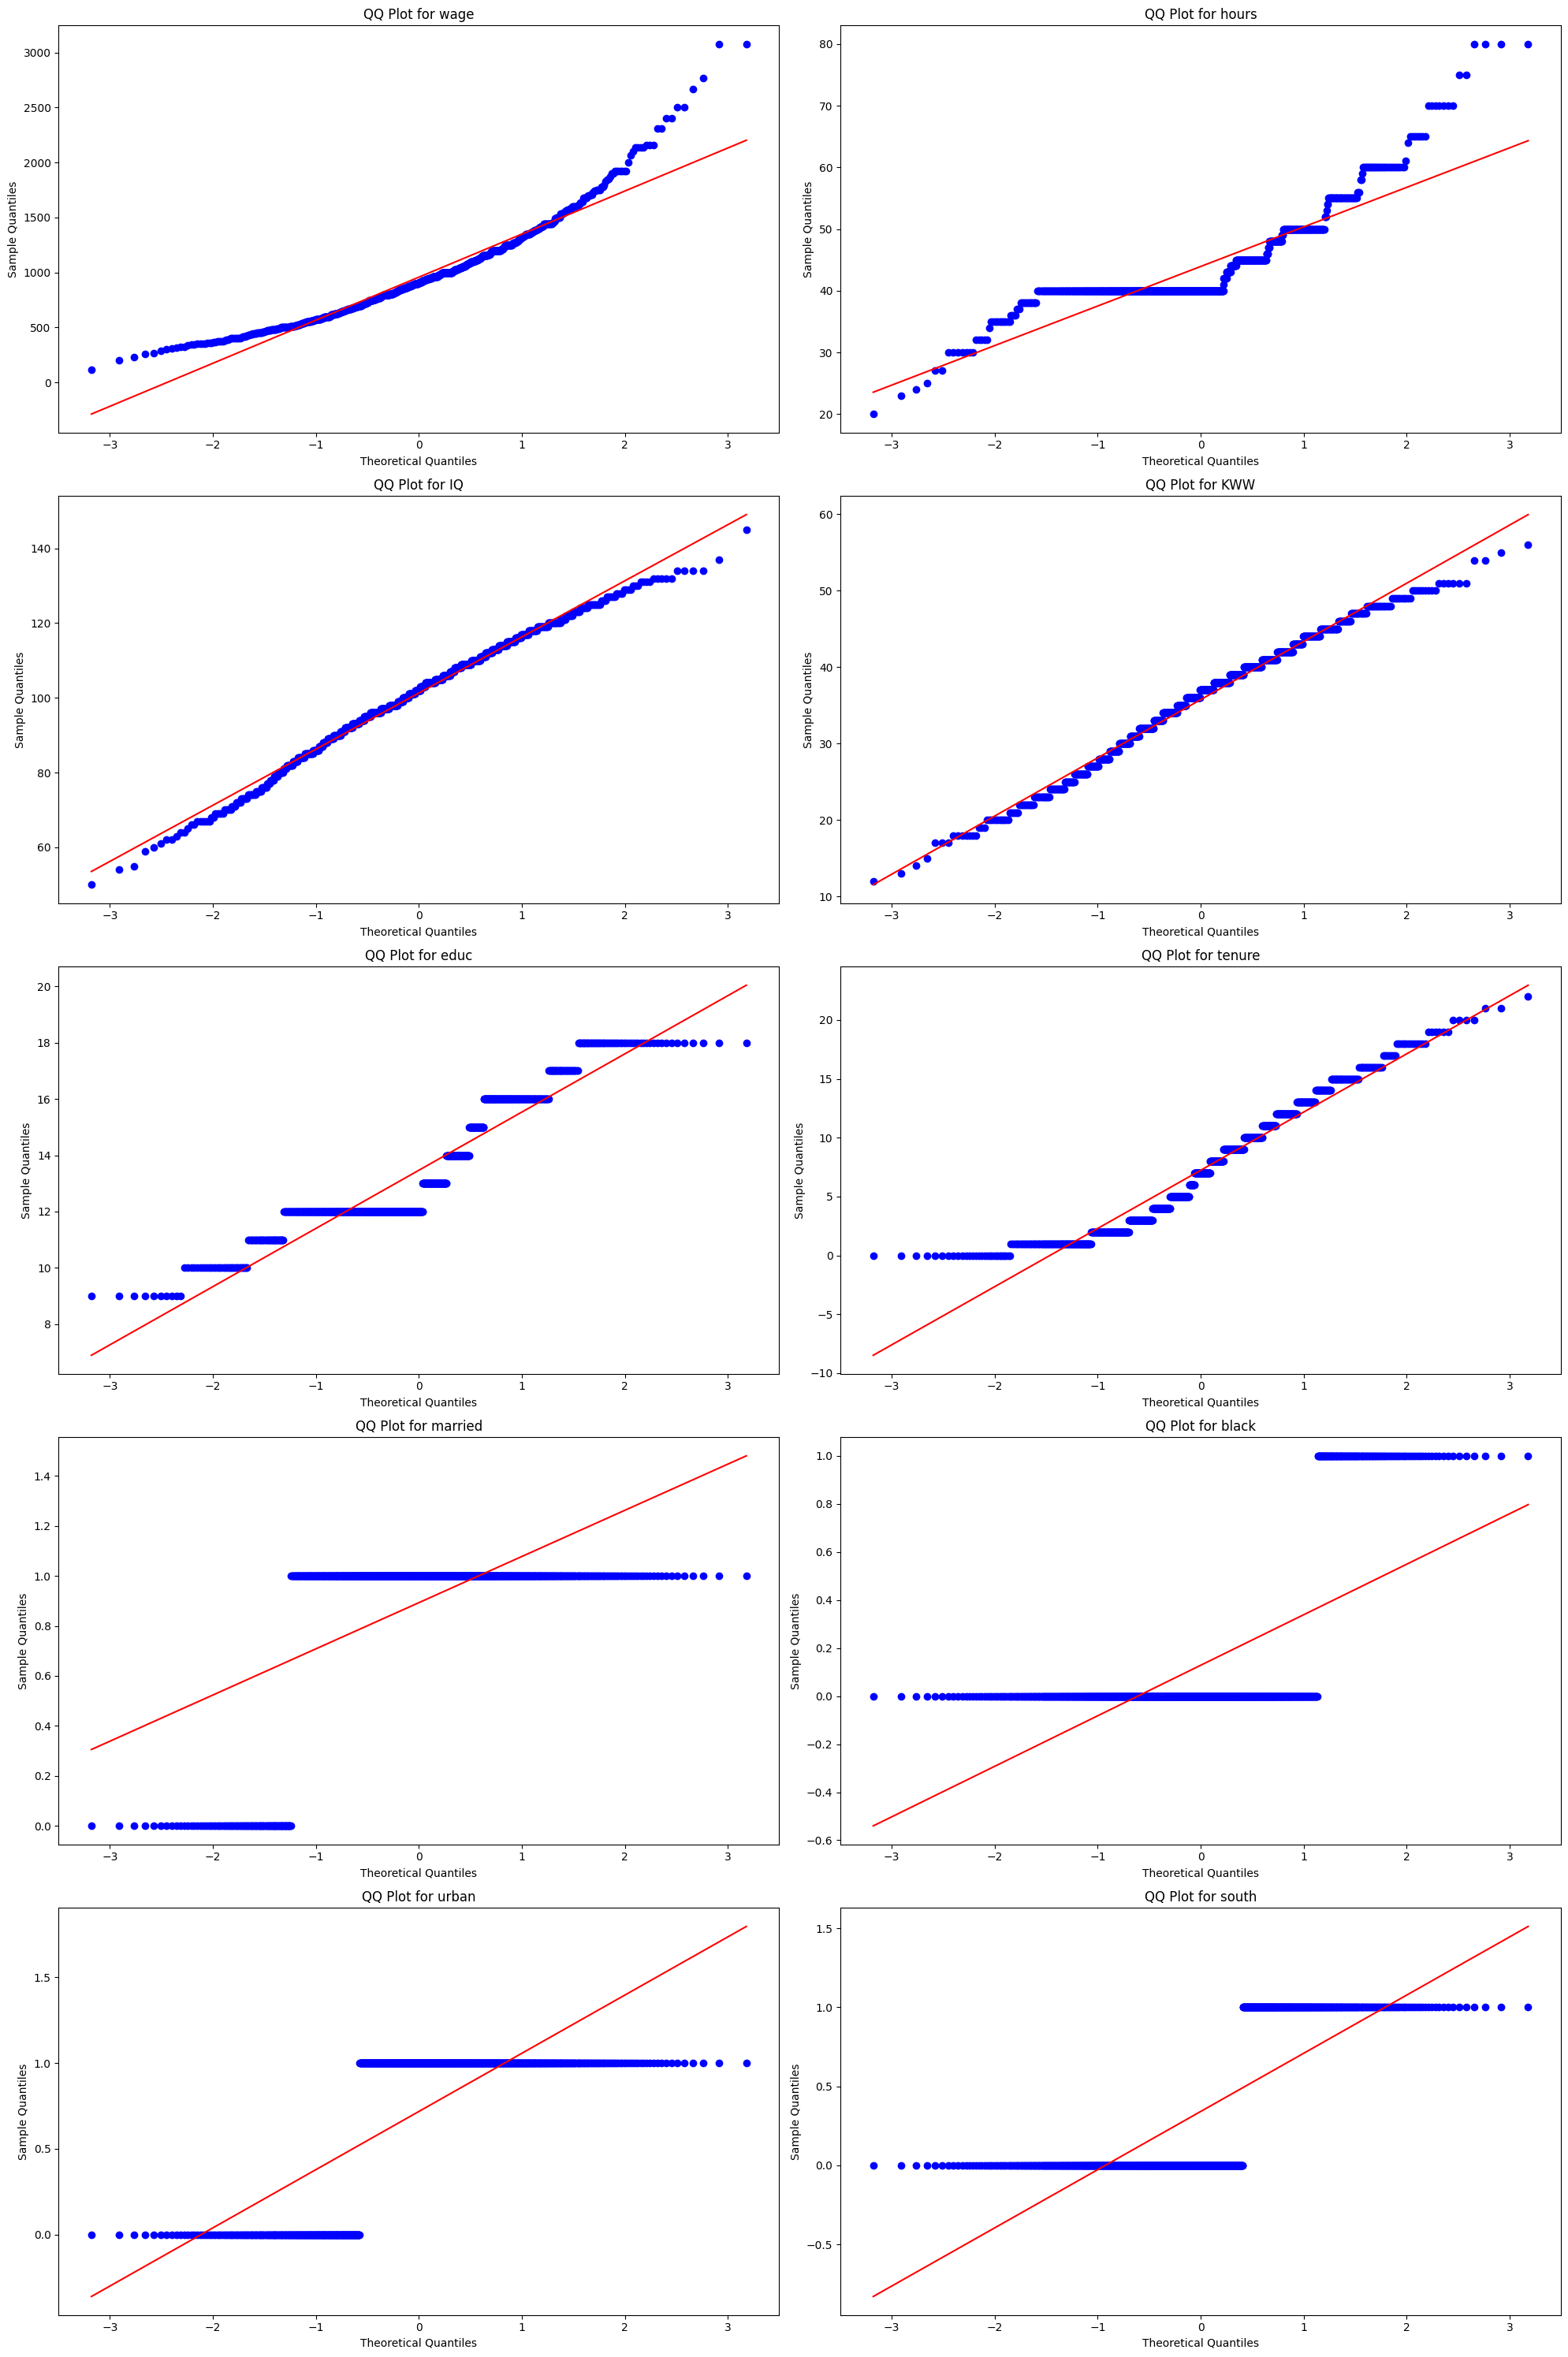

In [21]:
#Part 3: Plotting QQ Plots for each variable

selected_columns = df_final[['wage','hours','IQ','KWW','educ','tenure','married','black','urban','south']]

# Create a figure with subplots for QQ plots
qqplot = len(selected_columns)
fig, axes = plt.subplots(5 ,2 , figsize=(20,30))
axes = axes.ravel()

for x, y in enumerate(selected_columns):
    ax = axes[x]
    data = selected_columns[y]

    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(f'QQ Plot for {y}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

#Ploting qq plots for each variable
plt.tight_layout()
plt.show()

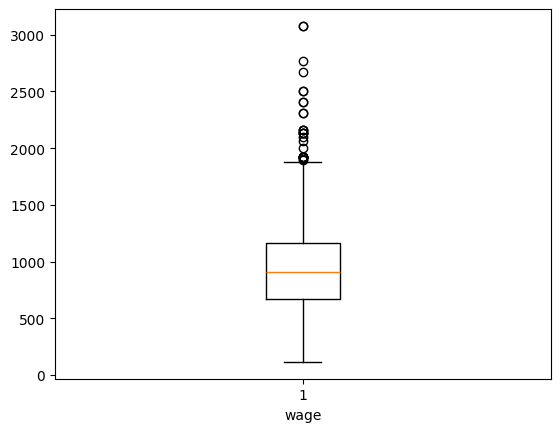

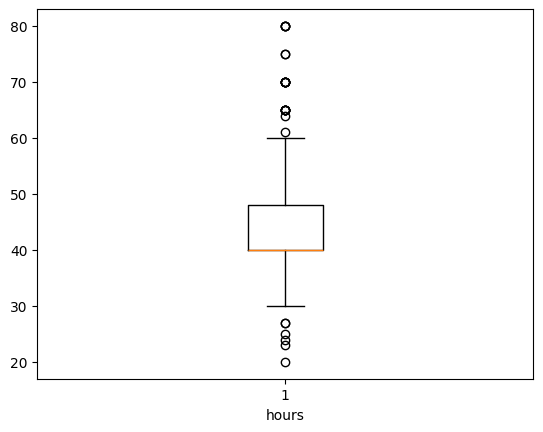

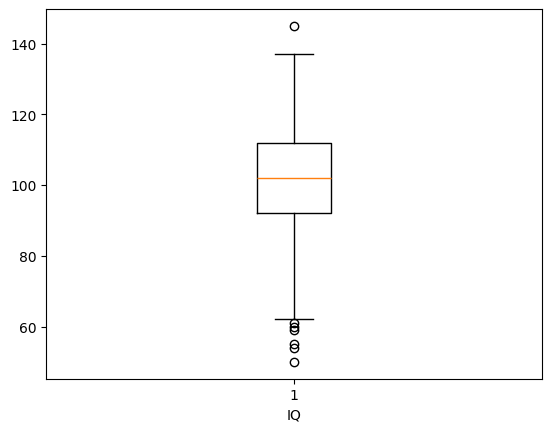

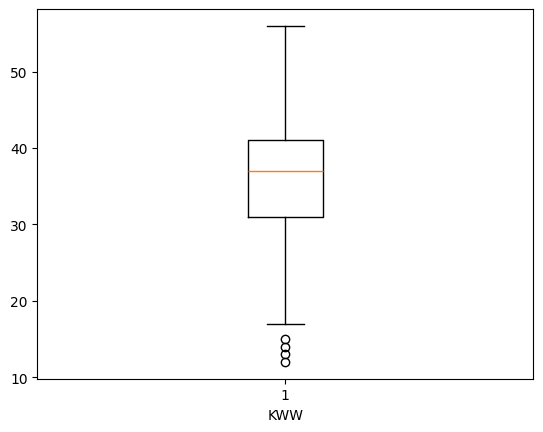

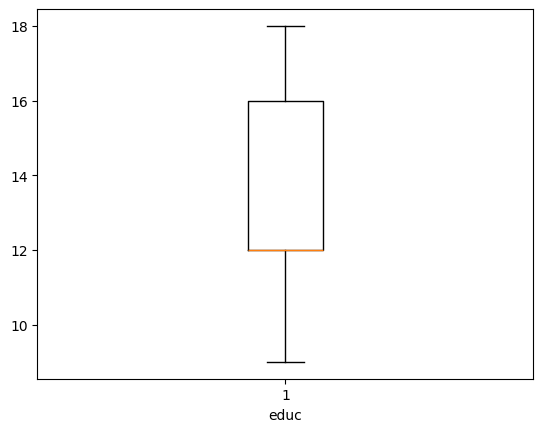

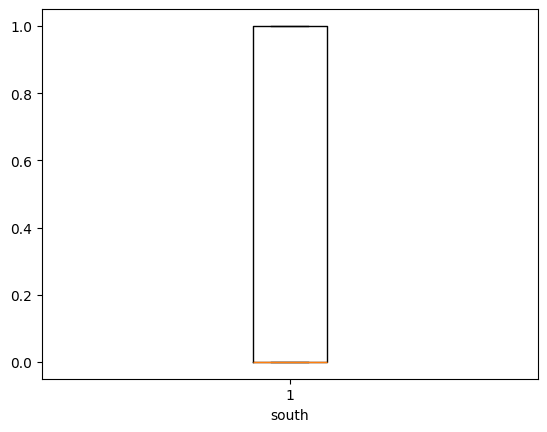

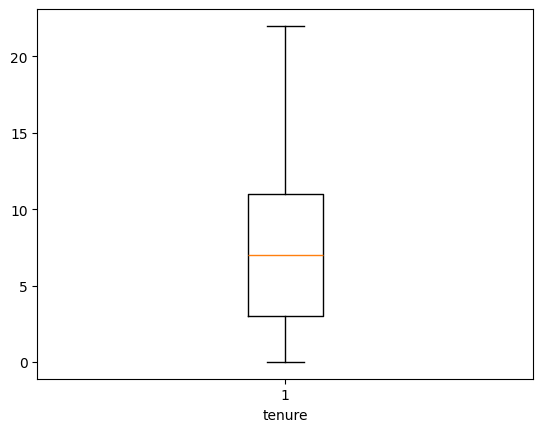

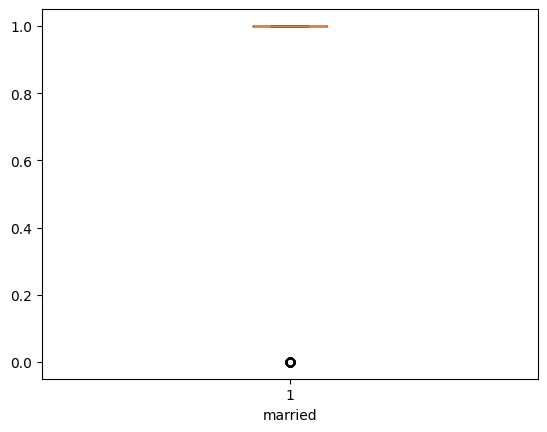

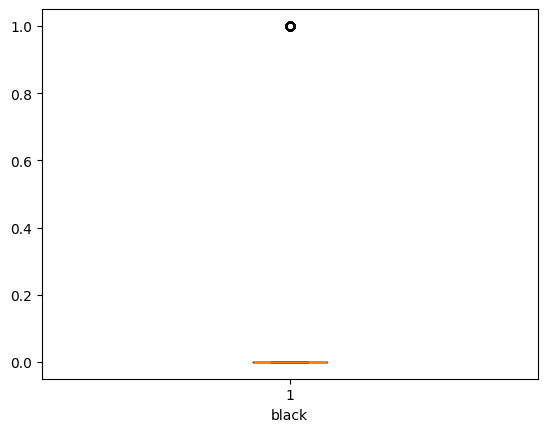

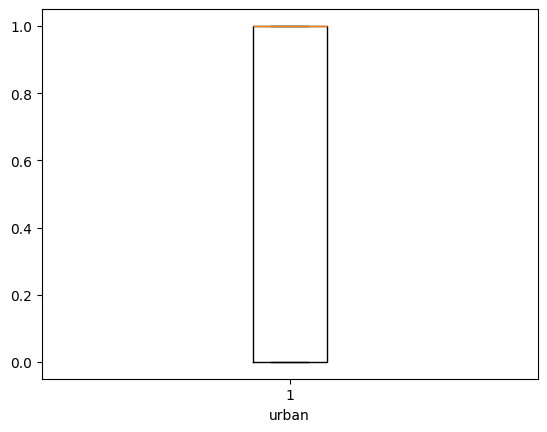

In [60]:
#Part4: Box Plots
selected_columns = df_final[['wage','hours','IQ','KWW','educ','south','tenure','married','black','urban']]

for a in selected_columns:
  plt.boxplot(selected_columns[a])
  plt.xlabel(a)
  plt.show()

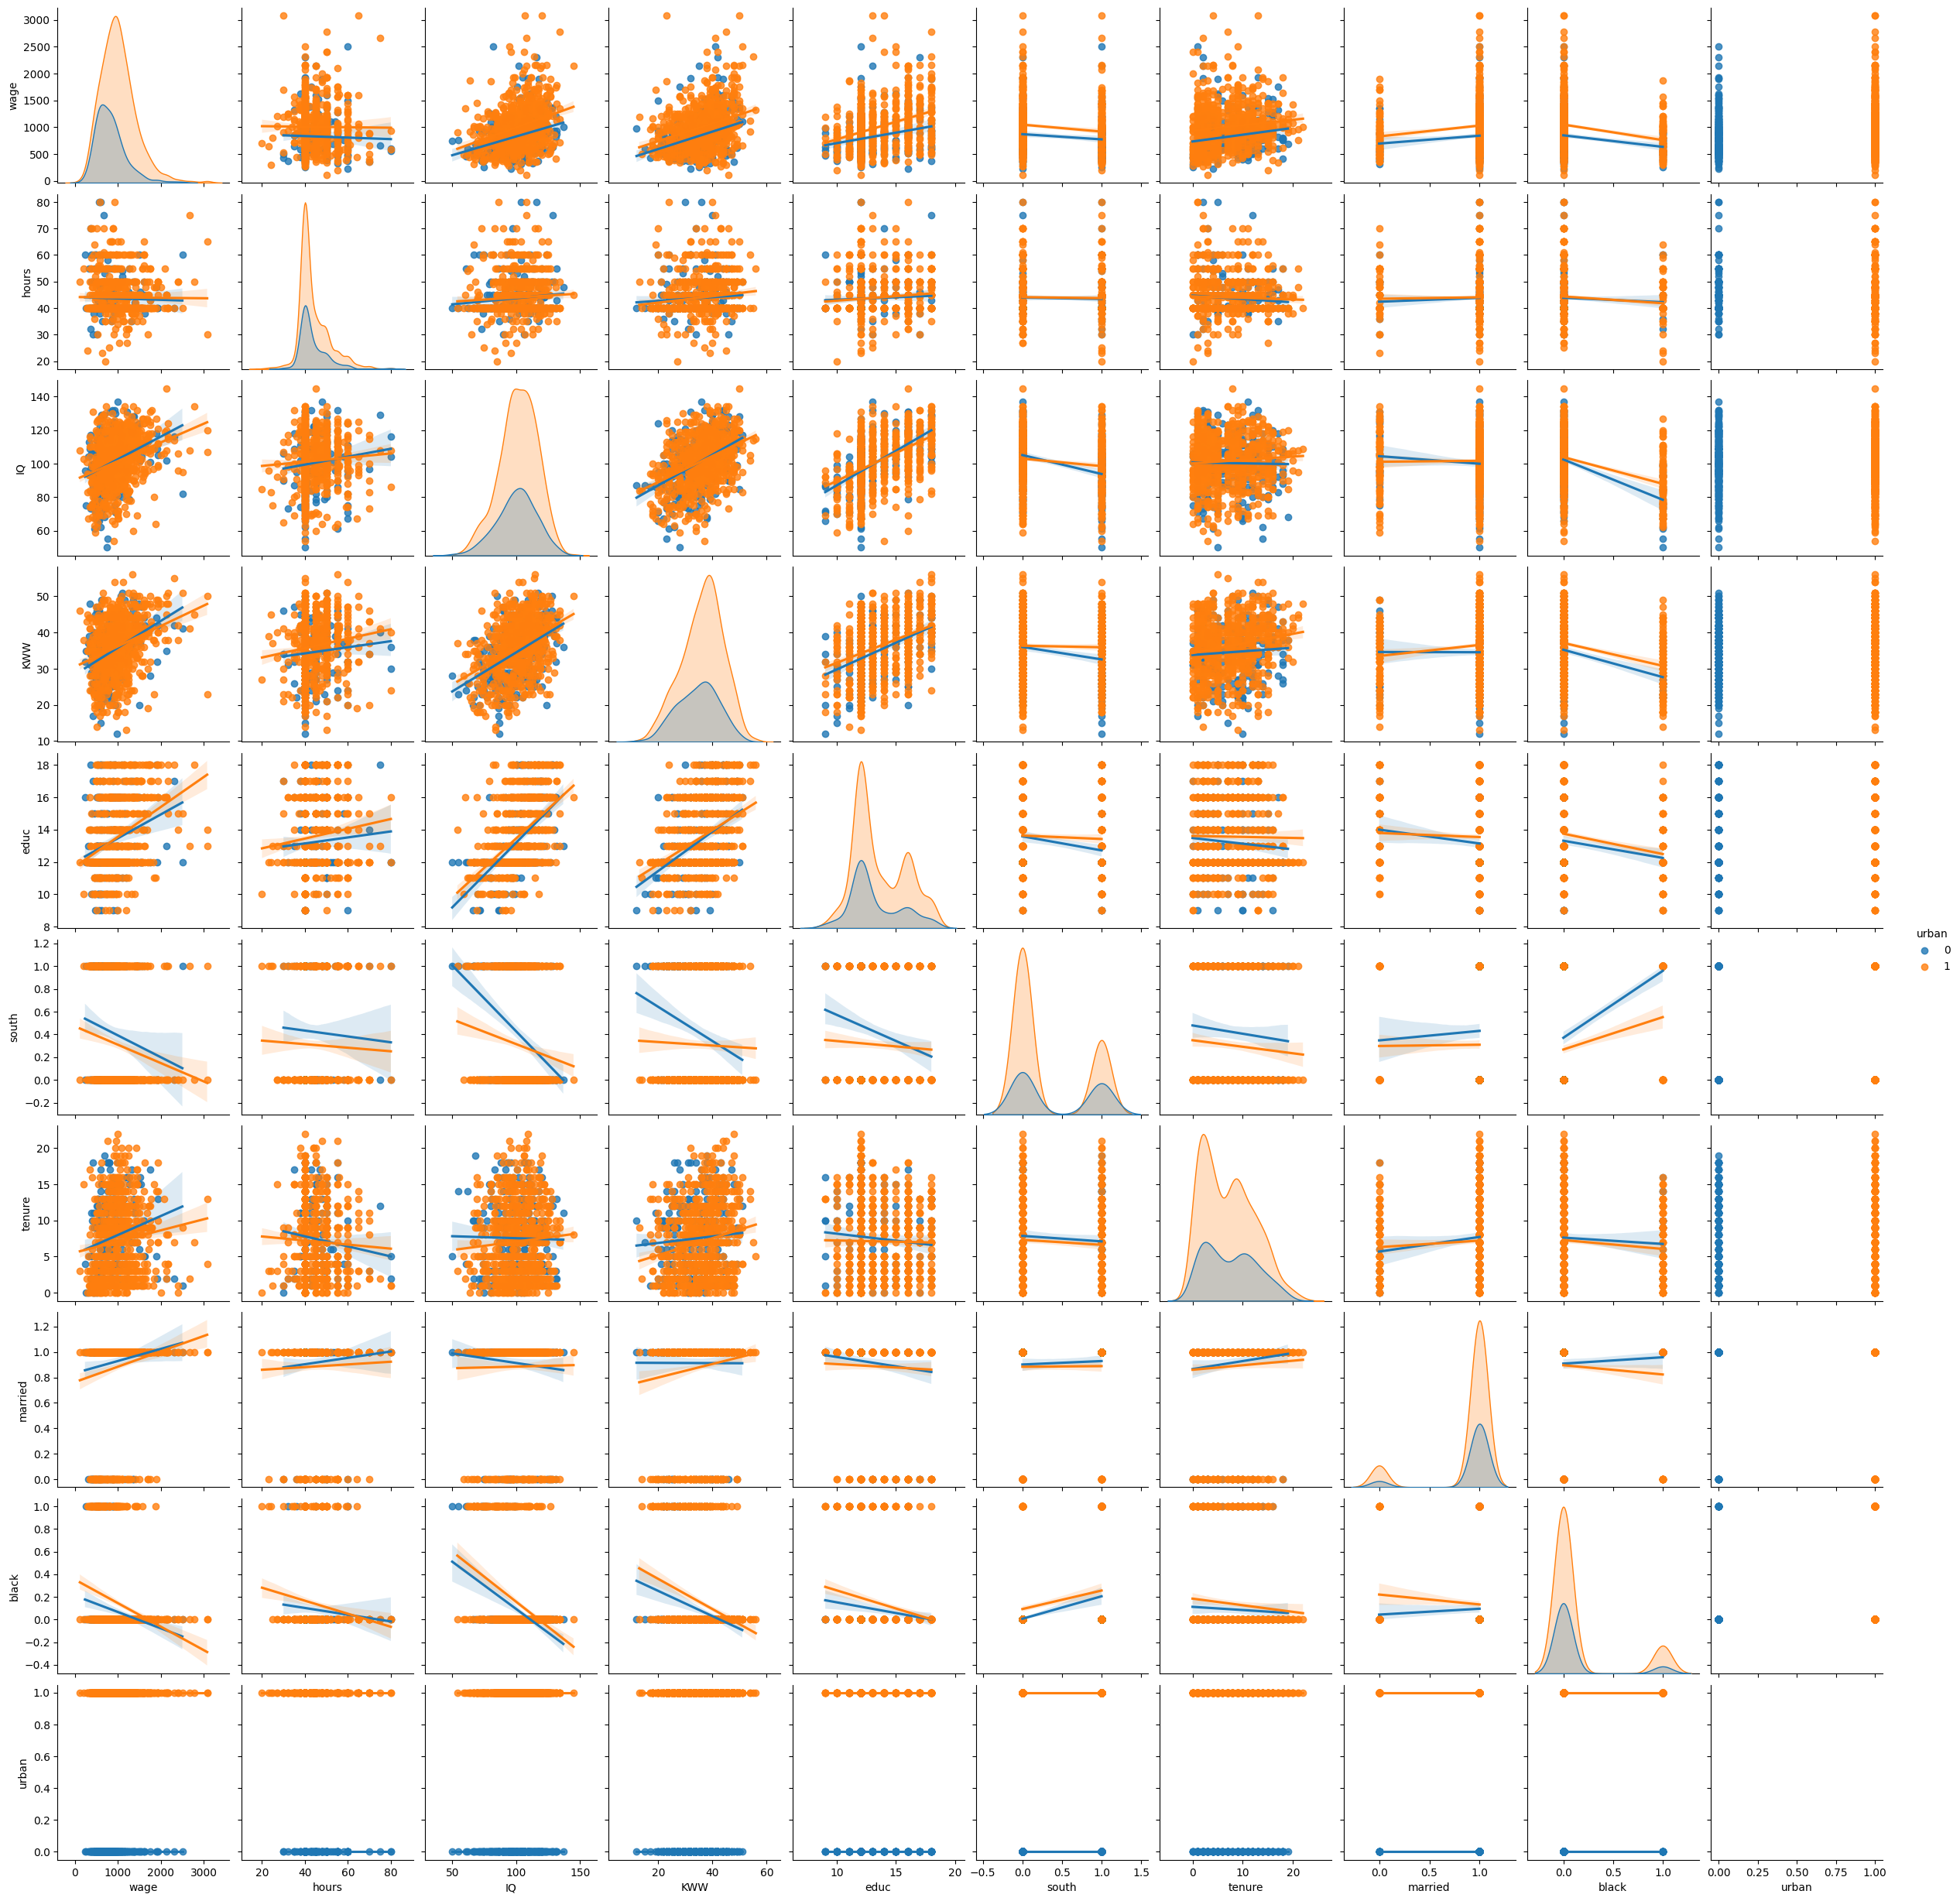

In [61]:
#Part 5: Scatterplot Matrix

sns.pairplot(df_final ,vars=['wage','hours','IQ','KWW','educ','south','tenure','married','black','urban'], kind = "reg", hue='urban')

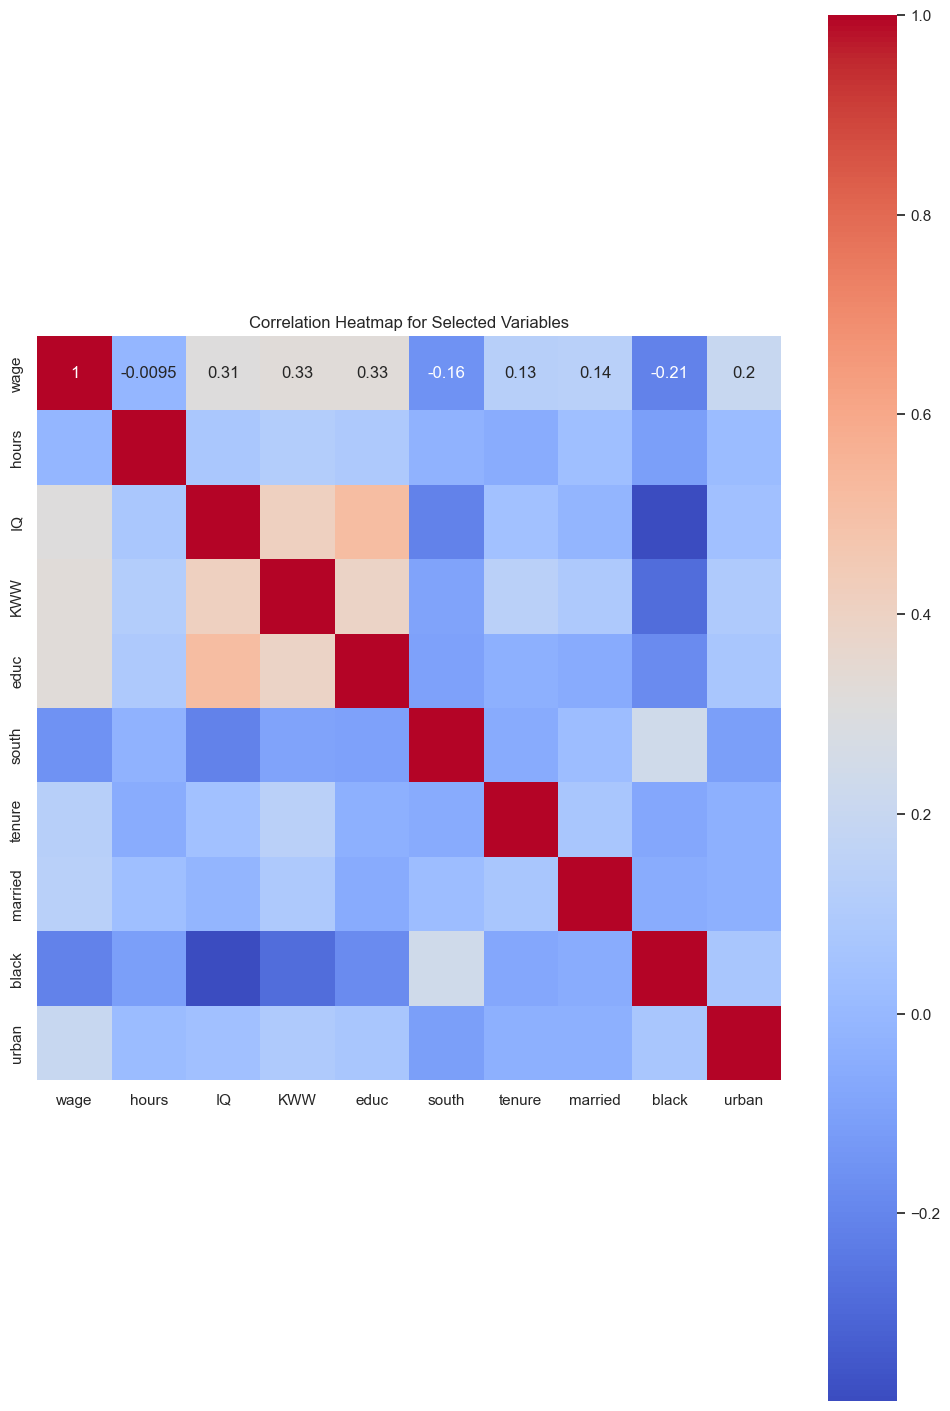

In [62]:
# Part 6: Using the heatmap function to create a correlation heatmap

correlation_matrix = selected_columns.corr()

sns.set(font_scale=1)
plt.figure(figsize=(12, 18))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, square=True)

plt.title("Correlation Heatmap for Selected Variables")
plt.show()

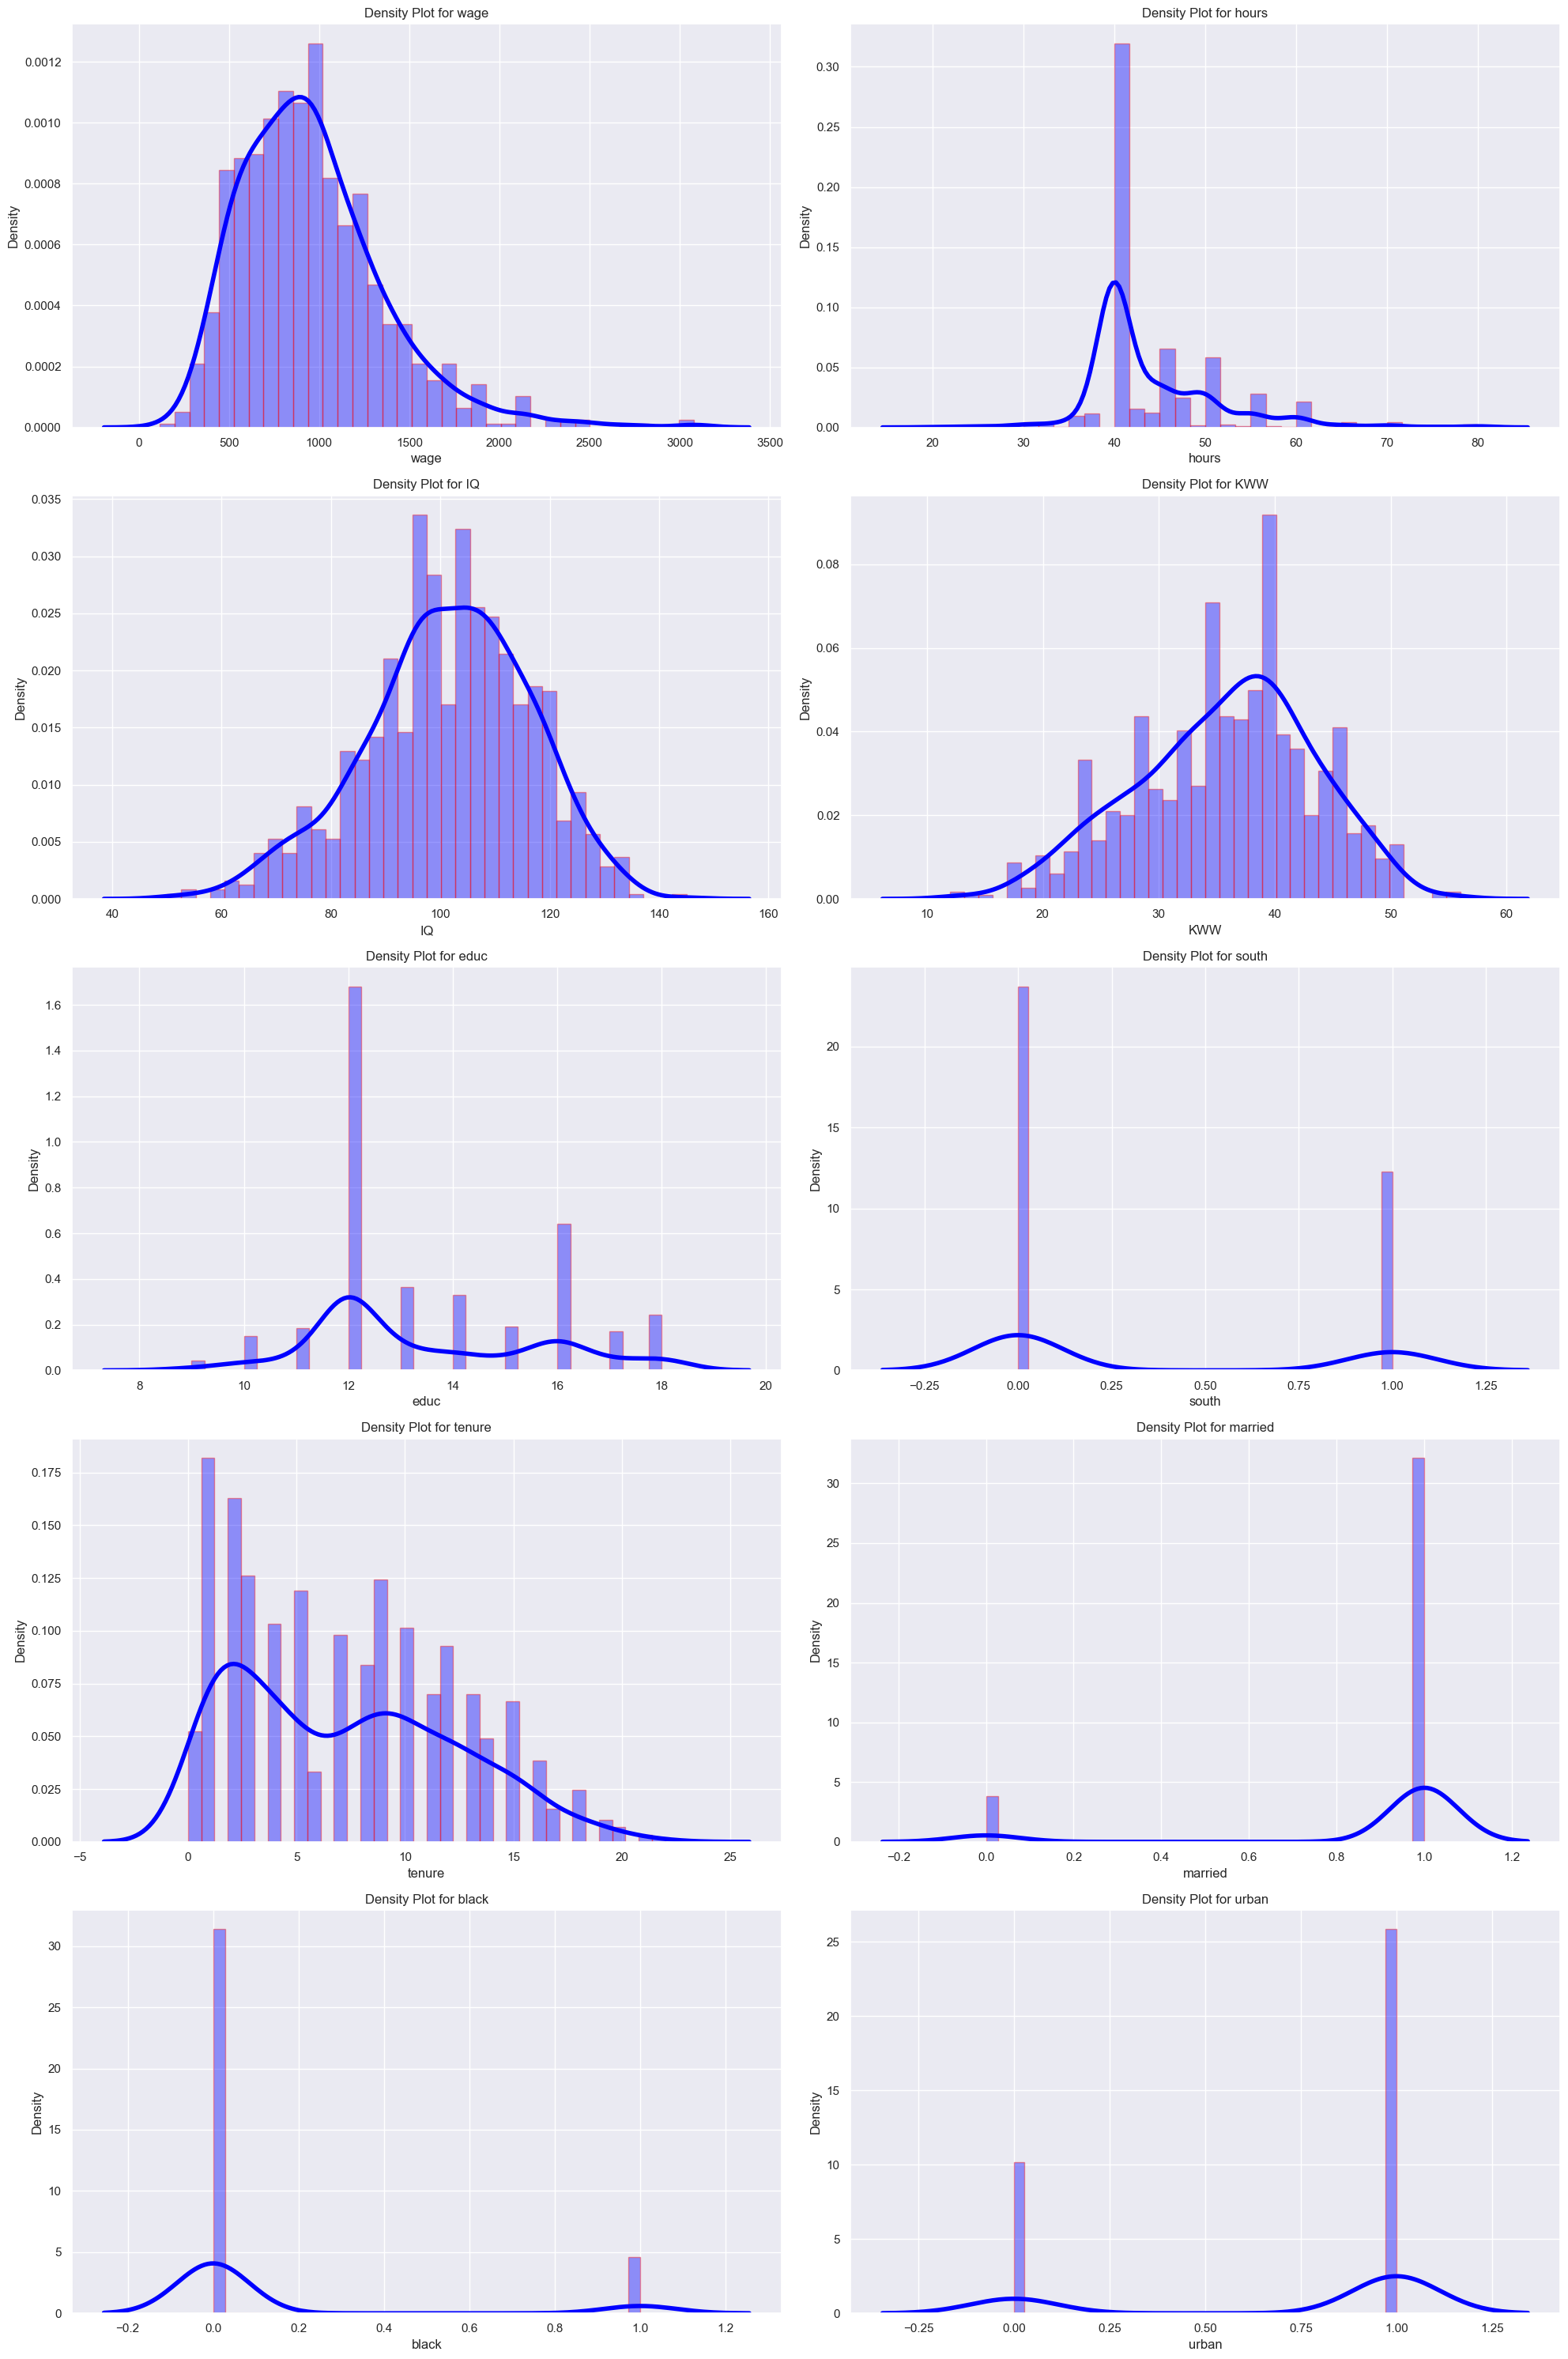

In [63]:
# Part 7: Density plots 
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots for Density estimates
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
axes = axes.ravel()

# Creating density plots for each variable in the selected_columns list using a for loop:
for a, b in enumerate(selected_columns):
    ax = axes[a]
    data = selected_columns[b]

    # Create a density plot for the variable
    sns.distplot(data, ax=ax, hist=True, kde=True,
                 bins=int(180/5), color='blue',
                 hist_kws={'edgecolor': 'red'},
                 kde_kws={'linewidth': 4})
    ax.set_title(f'Density Plot for {b}')
    ax.set_xlabel(b)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()


### 2(b)

In [22]:
import math

In [23]:
selected_variables= ['wage','hours','IQ','KWW','educ','south','tenure','married','black','urban']

In [24]:
from fitter import Fitter
f = Fitter(df_final[selected_variables])
f.fit()

SKIPPED _fit distribution (taking more than 30 seconds)
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:3485: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:3485: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:4355: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(llc, _a, x)[0]
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED johnsonsb distribution (taking more than 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gibrat,0.000012,3112.123461,3126.409724,inf,0.299556,0.0
gilbrat,0.000012,3112.123461,3126.409724,inf,0.299556,0.0
cauchy,0.000063,2593.724386,2608.010650,inf,0.373260,0.0
exponweib,0.000071,2603.880659,2632.453185,inf,0.365354,0.0
wald,0.000097,3447.627541,3461.913804,inf,0.297792,0.0


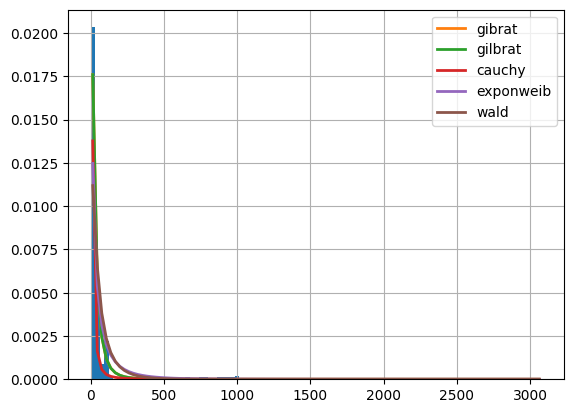

In [25]:
f.summary()

# Checking for linearity for each selected variable

In [26]:
mr_mod = smf.ols(formula='wage ~ hours+IQ+KWW+educ+tenure+married+black+south+urban', data=df_final)
mr_fit = mr_mod.fit()
print(mr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     31.99
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           4.57e-49
Time:                        16:33:21   Log-Likelihood:                -6811.7
No. Observations:                 935   AIC:                         1.364e+04
Df Residuals:                     925   BIC:                         1.369e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -208.6167    125.183     -1.666      0.0

### Above is the regression analysis of the selected variables without any transformations.

In [27]:
df3 = df_final.copy()

### To check for linearity, I'll run the Harvey-Collier on every quantitative variable separately by regressing them individuallly against 'wage'.

###  MODEL 1:  wage=𝛽0+𝛽1(hours)+𝑢
                                     

In [28]:
reg = smf.ols('wage ~ hours', data = df3)
model1 = reg.fit()
model1.params

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08429
Date:                Wed, 22 Nov 2023   Prob (F-statistic):              0.772
Time:                        16:33:28   Log-Likelihood:                -6938.3
No. Observations:                 935   AIC:                         1.388e+04
Df Residuals:                     933   BIC:                         1.389e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    981.3151     81.575     12.030      0.0

### MODEL 2:  wage=𝛽0+𝛽1(IQ)+𝑢

In [29]:
reg = smf.ols('wage ~ IQ', data = df3)
model2 = reg.fit()
model2.params

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     98.55
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           3.79e-22
Time:                        16:33:32   Log-Likelihood:                -6891.4
No. Observations:                 935   AIC:                         1.379e+04
Df Residuals:                     933   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.9916     85.642      1.366      0.1

### MODEL 3:  wage=𝛽0+𝛽1(KWW)+𝑢

In [30]:
reg = smf.ols('wage ~ KWW', data = df3)
model3 = reg.fit()
model3.params

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.31e-24
Time:                        16:33:36   Log-Likelihood:                -6885.8
No. Observations:                 935   AIC:                         1.378e+04
Df Residuals:                     933   BIC:                         1.379e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    340.8619     59.880      5.692      0.0

### MODEL 4:  wage=𝛽0+𝛽1(educ)+𝑢

In [31]:
reg = smf.ols('wage ~ educ', data = df3)
model4 = reg.fit()
model4.params

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     111.8
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           9.35e-25
Time:                        16:33:40   Log-Likelihood:                -6885.5
No. Observations:                 935   AIC:                         1.377e+04
Df Residuals:                     933   BIC:                         1.378e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    146.9524     77.715      1.891      0.0

### MODEL 5:  wage=𝛽0+𝛽1(tenure)+𝑢

In [32]:
reg = smf.ols('wage ~ tenure', data = df3)
model5 = reg.fit()
model5.params

print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     15.61
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           8.39e-05
Time:                        16:33:43   Log-Likelihood:                -6930.6
No. Observations:                 935   AIC:                         1.387e+04
Df Residuals:                     933   BIC:                         1.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    884.0155     22.856     38.678      0.0

### MODEL 6:  wage=𝛽0+𝛽1(married)+𝑢

In [33]:
reg = smf.ols('wage ~ married', data = df3)
model6 = reg.fit()
model6.params

print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     17.74
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           2.78e-05
Time:                        16:33:48   Log-Likelihood:                -6929.6
No. Observations:                 935   AIC:                         1.386e+04
Df Residuals:                     933   BIC:                         1.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    798.4400     40.079     19.922      0.0

### MODEL 7:  wage=𝛽0+𝛽1(black)+𝑢

In [34]:
reg = smf.ols('wage ~ black', data = df3)
model7 = reg.fit()
model7.params

print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     43.42
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           7.37e-11
Time:                        16:33:49   Log-Likelihood:                -6917.1
No. Observations:                 935   AIC:                         1.384e+04
Df Residuals:                     933   BIC:                         1.385e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    990.6479     13.853     71.511      0.0

### MODEL 8:  wage=𝛽0+𝛽1(south)+𝑢

In [35]:
#OLS for model 8

reg = smf.ols('wage ~ south', data = df3)
model8 = reg.fit()
model8.params
# Look at the Model1 Fit Summary
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     24.32
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           9.66e-07
Time:                        16:33:52   Log-Likelihood:                -6926.3
No. Observations:                 935   AIC:                         1.386e+04
Df Residuals:                     933   BIC:                         1.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1004.3003     16.093     62.408      0.0

### MODEL 9:  wage=𝛽0+𝛽1(urban)+𝑢

In [36]:
#OLS for model 9

reg = smf.ols('wage ~ urban', data = df3)
model9 = reg.fit()
model9.params
# Look at the Model1 Fit Summary
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     38.23
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           9.38e-10
Time:                        16:33:56   Log-Likelihood:                -6919.6
No. Observations:                 935   AIC:                         1.384e+04
Df Residuals:                     933   BIC:                         1.385e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    830.1098     24.405     34.014      0.0

In [37]:
import statsmodels.stats.api as sms
from simple_colors import *
# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(model1)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))
print("\n")


Linearity Test Results:
[('t-stat', -4.2447026746164305), ('p-value', 2.4080870687720246e-05)]




### Evaluating Model 1

Linearity Test: Since for model 1, negative t-statistic of -4.2447, which suggests a negative deviation from linearity. On the other hand the p-value is 2.4080870687720246e-05 which is significant at both 5% and 10% level of significance provides evidence that the deviation from linearity is statistically significant.

In [38]:
# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(model2)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))
print("\n")

Linearity Test Results:
[('t-stat', -2.326616977074422), ('p-value', 0.020199458045106387)]




### Evaluating Model 2

Linearity Test: Since for model 2, negative t-statistic of -2.3266, which suggests a negative deviation from linearity. On the other hand the p-value is 0.020199458045106387 which is significant at both 5% and 10% level of significance provides evidence that the deviation from linearity is statistically significant.

In [39]:
# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(model3)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))
print("\n")

Linearity Test Results:
[('t-stat', -2.387357927521379), ('p-value', 0.017168624939659663)]




### Evaluating Model 3

Linearity Test: Since for model 3, negative t-statistic of -2.3873, which suggests a negative deviation from linearity. On the other hand the p-value is 0.017168624939659663 which is significant at both 5% and 10% level of significance provides evidence that the deviation from linearity is statistically significant.


In [40]:
# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(model4)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))
print("\n")

Linearity Test Results:
[('t-stat', -3.1741929762838534), ('p-value', 0.0015518649247491774)]




### Evaluating Model 4

Linearity Test: Since for model 4, negative t-statistic of -3.17419, which suggests a negative deviation from linearity. On the other hand the p-value is 0.0015518649247491774 which is significant at both 5% and 10% level of significance provides evidence that the deviation from linearity is statistically significant.


In [41]:
# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(model5)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))
print("\n")

Linearity Test Results:
[('t-stat', -3.9387440116833012), ('p-value', 8.802485018484964e-05)]




### Evaluating Model 5

Linearity Test: Since for model 5, negative t-statistic of -3.9387, which suggests a negative deviation from linearity. On the other hand the p-value is  which is 8.802485018484964e-05 significant at both 5% and 10% level of significance provides evidence that the deviation from linearity is statistically significant.


### Interpretation:

If the p-value is greater than your chosen significance level (e.g., 0.05), you fail to reject the null hypothesis of linearity, suggesting that the model is linear.
If the p-value is less than your significance level, you may have evidence to reject the null hypothesis, indicating potential non-linearity.

### Therefore, all quantitative variables are non linear and the indicator variables are linear. We perform the box cox transformation to quant variables.


# Transformation of variables

### Box Cox for hours, IQ, KWW and educ. Log transformation for tenure.

In [42]:
from scipy.stats import boxcox

-0.739890389696599


/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


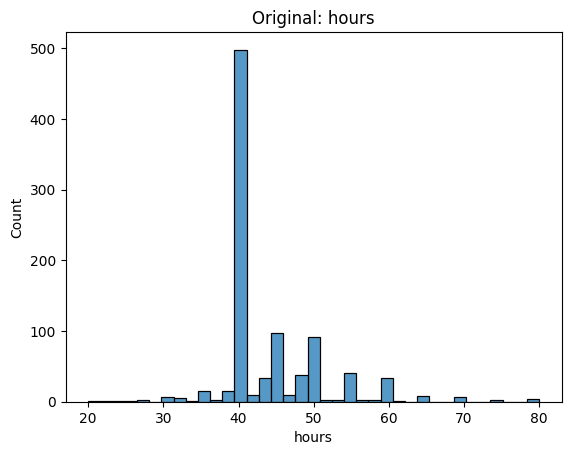

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


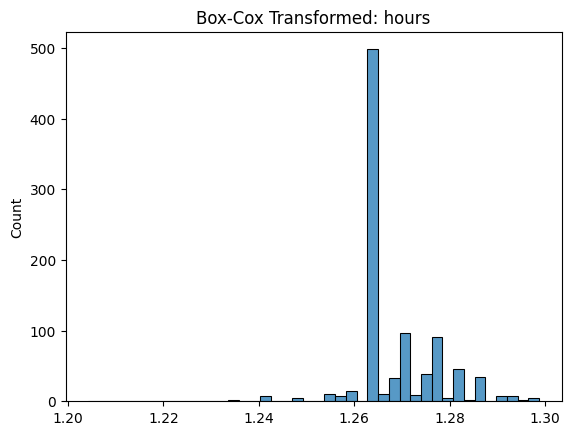

0.18756604297963458


/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


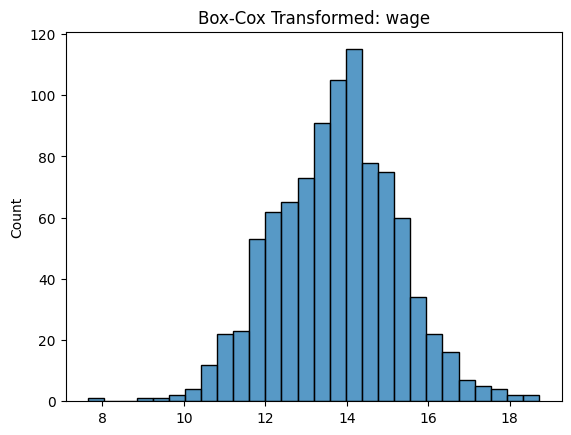

1.7488134174555654


/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


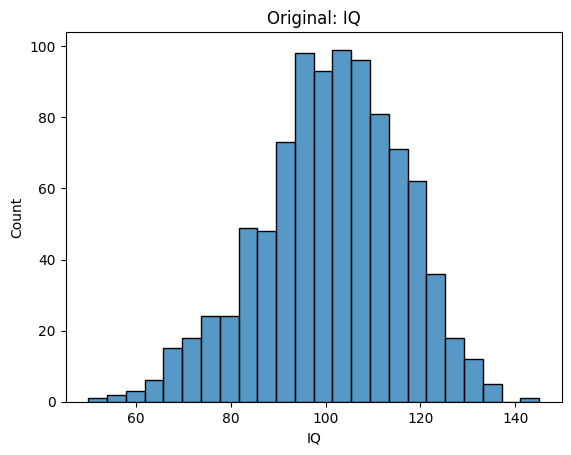

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


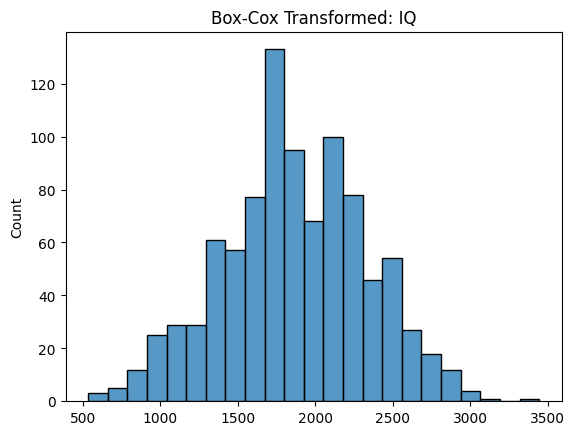

0.18756604297963458


/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


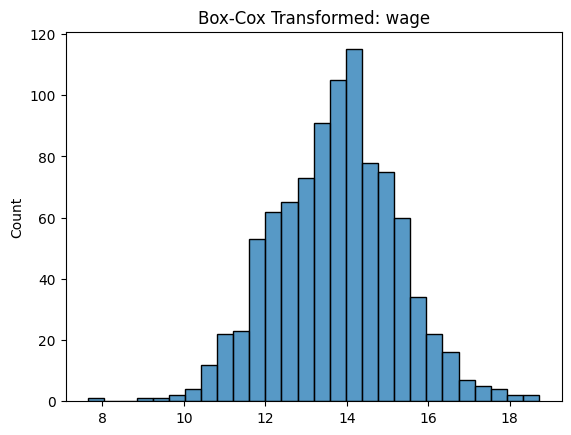

1.4366114628103914


/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


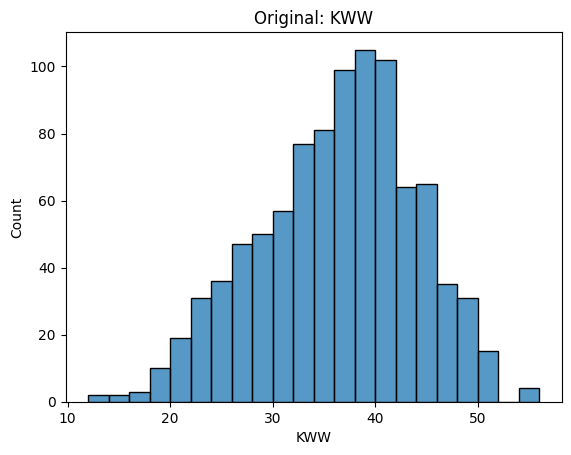

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


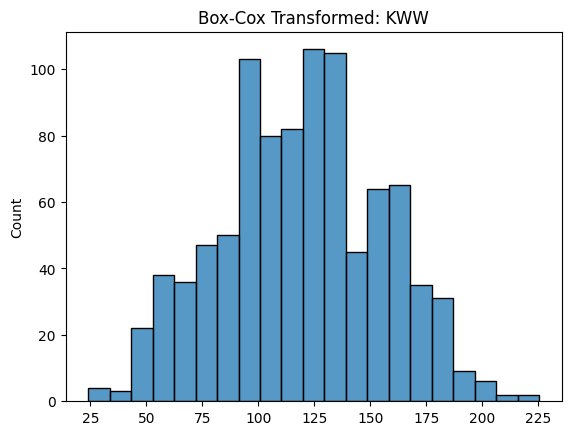

0.18756604297963458


/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


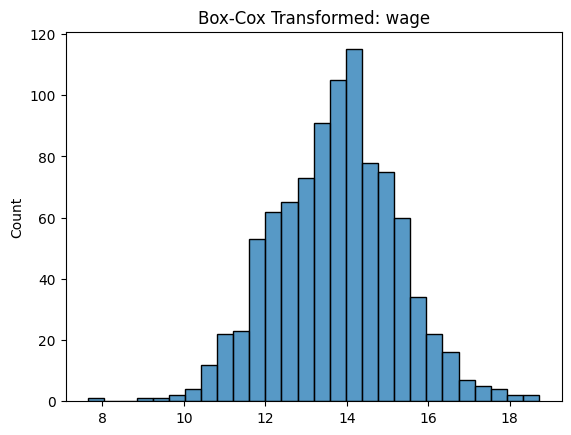

-0.8370651207092008


/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


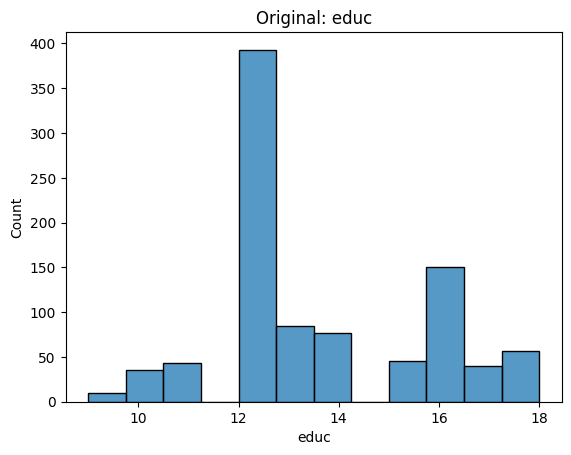

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


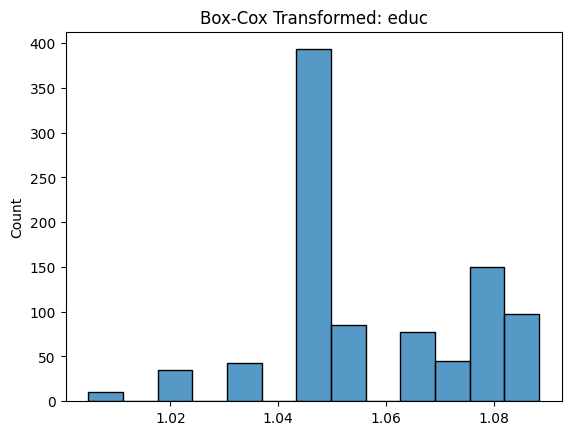

0.18756604297963458


/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


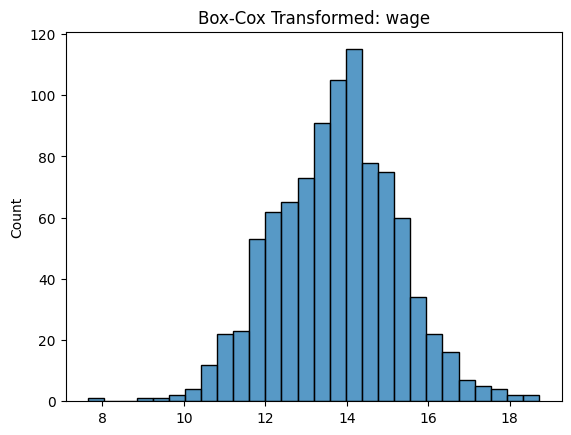

In [43]:
# Box-Cox Transformations
import scipy
var_list = ['hours','IQ','KWW','educ']
for var in var_list:
    bc_var,lambda_var = scipy.stats.boxcox(df3[var])
    print(lambda_var)

    sns.histplot(df3[var])
    plt.title("Original: "+var)
    plt.show()

    sns.histplot(bc_var)
    plt.title("Box-Cox Transformed: "+var)
    plt.show()

    bc_wage,lambda_wage = scipy.stats.boxcox(df3["wage"])
    print(lambda_wage)

    sns.histplot(bc_wage)
    plt.title("Box-Cox Transformed: wage")
    plt.show()

In [ ]:
sns.lmplot(x = 'wage', y = 'tenure', data = df3, line_kws = {'color':'red'}, height=3, aspect=1.5)
plt.title('log(y)~x')

### The Box-Cox transformation is primarily designed for positive continuous variables. Since binary variables, like married, black, south, urban (assuming it's binary based on the context), take on values of 0 or 1, applying a Box-Cox transformation doesn't make sense in this context. The Box-Cox transformation assumes a range of positive values, and it's not applicable to binary variables.

### When dealing with non-linear relationships between variables in a regression analysis, you might consider various transformations to make the relationship more linear. Here are some common transformations:

1. Logarithmic Transformation: If the relationship appears to be exponential, taking the logarithm of one or both variables might help linearize it.

2. Square Root Transformation: Useful when the variance of the dependent variable increases with its mean.

3. Reciprocal Transformation: Useful for variables that exhibit diminishing returns.

4. Polynomial Transformation: Introduce polynomial terms (squared, cubed, etc.) to capture non-linear patterns.

5. Box-Cox Transformation: A family of power transformations that includes the logarithmic transformation as a special case. Useful when you're unsure about the specific form of the transformation.

6. Interaction Terms: Include interaction terms between variables to capture combined effects.

If you include non-linear variables in your regression models without transforming them first, you might encounter several issues:

1. Model Misspecification: The model assumes a linear relationship, and if the relationship is genuinely non-linear, the model will be misspecified.

2. Biased Parameter Estimates: The coefficients estimated by the model may be biased and not accurately represent the true underlying relationships.

3. Incorrect Inference: Standard errors, p-values, and confidence intervals may be incorrect, leading to incorrect statistical inferences.

4. Poor Predictive Performance: The model might not generalize well to new data, especially if the non-linearity is significant.

Consequences of Including Non-Transformed Non-Linear Variables:

1. Biased Estimates: The estimated coefficients may not accurately represent the true relationships.
2. Inefficient Inference: Standard errors and hypothesis tests may be unreliable.
3. Misspecified Model: Violation of the linearity assumption can lead to a misspecified model.
4. Incorrect Predictions: Predictions based on a model with non-transformed non-linear variables may be inaccurate.

# 2d. Checking for outliers

In [ ]:
df3

In [ ]:
selected_variables2 = df3[['wage','hours','IQ','KWW', 'educ','tenure', 'married','black', 'south','urban']]

for a in selected_variables2:
  plt.boxplot(selected_variables2[a])
  plt.xlabel(a)
  plt.show()

Outliers can affect the assumptions of our analysis. Outliers can influence the mean, variance, and correlations, potentially leading to biased results.
Handling Outliers:

Removal: If outliers are due to errors or if they unduly influence the analysis, removal may be justified. However, indiscriminate removal can lead to data snooping or bias.

Transformation: We transform the variables to reduce the impact of outliers.(Log transformation) 

### 2E. We have imputed all the NA values at the start by taking their means and median.

# Question 3

### We now try forming various models and decide on one on the basis of r-squared value, AIC and BIC.

# Model 1

In [96]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to 'hours'
transformed_hours, lambda_hours = boxcox(df3['hours'] + 1)  # Adding 1 to handle zero values
df3['transformed_hours'] = transformed_hours

# Apply Box-Cox transformation to 'IQ'
transformed_IQ, lambda_IQ = boxcox(df3['IQ'] + 1)  # Adding 1 to handle zero values
df3['transformed_IQ'] = transformed_IQ

# Apply Box-Cox transformation to 'KWW'
transformed_KWW, lambda_KWW = boxcox(df3['KWW'] + 1)  
df3['transformed_KWW'] = transformed_KWW

# Apply Box-Cox transformation to 'educ'
transformed_educ, lambda_educ = boxcox(df3['educ'] + 1)  
df3['transformed_educ'] = transformed_educ

df3['transformed_tenure'] = np.log(df3['tenure'] + 1)  
df3['transformed_urban'] = df3['urban']
df3['transformed_south'] = df3['south'] 
df3['transformed_married'] = df3['married'] 
df3['transformed_black'] = df3['black']

df_transformed = df3[['wage','transformed_hours', 'transformed_IQ', 'transformed_KWW', 'transformed_educ',
                      'transformed_tenure', 'transformed_married', 'transformed_black', 'transformed_south',
                      'transformed_urban']]

print(df_transformed.head())

   wage  transformed_hours  transformed_IQ  transformed_KWW  transformed_educ  \
0   769           1.199933     1668.157015       125.032810          0.942528   
1   808           1.210645     2562.401823       156.601737          0.968640   
2   825           1.199933     2164.000763       184.533584          0.953522   
3   650           1.199933     1762.869305       110.099143          0.942528   
4   562           1.199933     1121.606899        86.566610          0.935677   

   transformed_tenure  transformed_married  transformed_black  \
0            1.098612                    1                  0   
1            2.833213                    1                  0   
2            2.302585                    1                  0   
3            2.079442                    1                  0   
4            1.791759                    1                  0   

   transformed_south  transformed_urban  
0                  0                  1  
1                  0                  

### We apply box cox on all quant except tenure(log transformation)

In [97]:
import statsmodels.api as sm

# Create the design matrix (X) with the transformed predictor variables
X = df_transformed[['transformed_hours', 'transformed_IQ', 'transformed_KWW', 'transformed_educ', 'transformed_tenure',
        'transformed_married', 'transformed_black', 'transformed_south', 'transformed_urban']]

# Add a constant term to the design matrix
X = sm.add_constant(X)

# Assuming 'wage' is your dependent variable
y = df_transformed['wage']

# Fit the multiple regression model
model1 = sm.OLS(y, X).fit()

# Print the summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     32.48
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           8.93e-50
Time:                        15:30:36   Log-Likelihood:                -6810.0
No. Observations:                 935   AIC:                         1.364e+04
Df Residuals:                     925   BIC:                         1.369e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1829.7197   2

In [98]:
# Get AIC and BIC
aic = model1.aic
bic = model1.bic

print("AIC:", aic)
print("BIC:", bic)

AIC: 13639.958150524386
BIC: 13688.363615817272


# Model 2

In [99]:
# Apply Box-Cox transformation to 'hours'
transformed_hours, lambda_hours = boxcox(df3['hours'] + 1)  # Adding 1 to handle zero values
df3['transformed_hours'] = transformed_hours

# Apply Box-Cox transformation to 'IQ'
transformed_IQ, lambda_IQ = boxcox(df3['IQ'] + 1)  # Adding 1 to handle zero values
df3['transformed_IQ'] = transformed_IQ

# Apply Box-Cox transformation to 'KWW'
transformed_KWW, lambda_KWW = boxcox(df3['KWW'] + 1)  # Adding 1 to handle zero values
df3['transformed_KWW'] = transformed_KWW


df3['transformed_tenure'] = np.log(df3['tenure'] + 1)  # Adding 1 to handle zero values

# Now, df contains the original and transformed variables
# You can create a new DataFrame with only the transformed variables if needed
df_transformed1 = df3[['wage','transformed_hours', 'transformed_IQ', 'transformed_KWW', 'educ',
                      'transformed_tenure', 'married', 'black', 'south',
                      'urban']]

print(df_transformed1.head())

   wage  transformed_hours  transformed_IQ  transformed_KWW  educ  \
0   769           1.199933     1668.157015       125.032810    12   
1   808           1.210645     2562.401823       156.601737    18   
2   825           1.199933     2164.000763       184.533584    14   
3   650           1.199933     1762.869305       110.099143    12   
4   562           1.199933     1121.606899        86.566610    11   

   transformed_tenure  married  black  south  urban  
0            1.098612        1      0      0      1  
1            2.833213        1      0      0      1  
2            2.302585        1      0      0      1  
3            2.079442        1      0      0      1  
4            1.791759        1      0      0      1  


### We leave educ as it is and on others, we apply box cox and log

In [100]:
X = df_transformed1[['transformed_hours', 'transformed_IQ', 'transformed_KWW', 'educ',
                      'transformed_tenure', 'married', 'black', 'south',
                      'urban']]

# Add a constant term to the design matrix
X = sm.add_constant(X)

# Assuming 'wage' is your dependent variable
y = df_transformed1['wage']

# Fit the multiple regression model
model2 = sm.OLS(y, X).fit()

# Print the summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     32.80
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           3.09e-50
Time:                        15:31:00   Log-Likelihood:                -6808.9
No. Observations:                 935   AIC:                         1.364e+04
Df Residuals:                     925   BIC:                         1.369e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4373.5628   1928

In [101]:
# Get AIC and BIC
aic = model2.aic
bic = model2.bic

# Print the results
print("AIC:", aic)
print("BIC:", bic)

AIC: 13637.759345113764
BIC: 13686.16481040665


# Model 3

In [102]:
# Apply Box-Cox transformation to 'hours'
transformed_hours, lambda_hours = boxcox(df3['hours'] + 1)  # Adding 1 to handle zero values
df3['transformed_hours'] = transformed_hours

# Apply Box-Cox transformation to 'KWW'
transformed_KWW, lambda_KWW = boxcox(df3['KWW'] + 1)  # Adding 1 to handle zero values
df3['transformed_KWW'] = transformed_KWW

# Apply Box-Cox transformation to 'educ'
transformed_educ, lambda_educ = boxcox(df3['educ'] + 1)  # Adding 1 to handle zero values
df3['transformed_educ'] = transformed_educ

# For binary variables, you can use log transformation
df3['transformed_tenure'] = np.log(df3['tenure'] + 1)  # Adding 1 to handle zero values

df_transformed2 = df3[['wage','transformed_hours', 'IQ', 'transformed_KWW', 'transformed_educ',
                      'transformed_tenure', 'married', 'black', 'south',
                      'urban']]

print(df_transformed2.head())

   wage  transformed_hours   IQ  transformed_KWW  transformed_educ  \
0   769           1.199933   93       125.032810          0.942528   
1   808           1.210645  119       156.601737          0.968640   
2   825           1.199933  108       184.533584          0.953522   
3   650           1.199933   96       110.099143          0.942528   
4   562           1.199933   74        86.566610          0.935677   

   transformed_tenure  married  black  south  urban  
0            1.098612        1      0      0      1  
1            2.833213        1      0      0      1  
2            2.302585        1      0      0      1  
3            2.079442        1      0      0      1  
4            1.791759        1      0      0      1  


### We leave IQ as it is and on others, we apply box cox and log.

In [103]:
X = df_transformed2[['transformed_hours', 'IQ', 'transformed_KWW', 'transformed_educ',
                      'transformed_tenure', 'married', 'black', 'south',
                      'urban']]

# Add a constant term to the design matrix
X = sm.add_constant(X)

# Assuming 'wage' is your dependent variable
y = df_transformed2['wage']

# Fit the multiple regression model
model3 = sm.OLS(y, X).fit()

# Print the summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     32.35
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.40e-49
Time:                        15:31:43   Log-Likelihood:                -6810.4
No. Observations:                 935   AIC:                         1.364e+04
Df Residuals:                     925   BIC:                         1.369e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2046.8783   2211

In [104]:
# Get AIC and BIC
aic = model3.aic
bic = model3.bic

# Print the results
print("AIC:", aic)
print("BIC:", bic)

AIC: 13640.896047565922
BIC: 13689.301512858809


# Model 4

In [105]:
df3['transformed_tenure'] = np.log(df3['tenure'] + 1)  # Adding 1 to handle zero values
df3['transformed_hours'] = np.log(df3['hours'] + 1)  # Adding 1 to handle zero values
df3['transformed_IQ'] = np.log(df3['IQ'] + 1)  # Adding 1 to handle zero values
df3['transformed_KWW'] = np.log(df3['KWW'] + 1)  # Adding 1 to handle zero values
df3['transformed_educ'] = np.log(df3['educ'] + 1)  # Adding 1 to handle zero values

df_transformed3 = df3[['wage','transformed_hours', 'transformed_IQ', 'transformed_KWW', 'transformed_educ',
                      'transformed_tenure', 'transformed_married', 'transformed_black', 'transformed_south',
                      'transformed_urban']]

print(df_transformed3.head())

   wage  transformed_hours  transformed_IQ  transformed_KWW  transformed_educ  \
0   769           3.713572        4.543295         3.583519          2.564949   
1   808           3.931826        4.787492         3.737670          2.944439   
2   825           3.713572        4.691348         3.850148          2.708050   
3   650           3.713572        4.574711         3.496508          2.564949   
4   562           3.713572        4.317488         3.332205          2.484907   

   transformed_tenure  transformed_married  transformed_black  \
0            1.098612                    1                  0   
1            2.833213                    1                  0   
2            2.302585                    1                  0   
3            2.079442                    1                  0   
4            1.791759                    1                  0   

   transformed_south  transformed_urban  
0                  0                  1  
1                  0                  

### We apply log to all. 

In [106]:
X = df_transformed3[['transformed_hours', 'transformed_IQ', 'transformed_KWW', 'transformed_educ',
                      'transformed_tenure', 'transformed_married', 'transformed_black', 'transformed_south',
                      'transformed_urban']]

# Add a constant term to the design matrix
X = sm.add_constant(X)

# Assuming 'wage' is your dependent variable
y = df_transformed3['wage']

# Fit the multiple regression model
model4 = sm.OLS(y, X).fit()

# Print the summary
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     30.98
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.37e-47
Time:                        15:32:04   Log-Likelihood:                -6815.2
No. Observations:                 935   AIC:                         1.365e+04
Df Residuals:                     925   BIC:                         1.370e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2082.6767    

In [107]:
# Get AIC and BIC
aic = model4.aic
bic = model4.bic

# Print the results
print("AIC:", aic)
print("BIC:", bic)

AIC: 13650.394071519111
BIC: 13698.799536811997


# Model 5

In [108]:
df3['transformed_hours'] = np.log(df3['hours']+1)
 
# Apply Box-Cox transformation to 'IQ'
transformed_IQ, lambda_IQ = boxcox(df3['IQ'] + 1)  
df3['transformed_IQ'] = transformed_IQ

# Apply Box-Cox transformation to 'KWW'
transformed_KWW, lambda_KWW = boxcox(df3['KWW'] + 1)  
df3['transformed_KWW'] = transformed_KWW

# Apply Box-Cox transformation to 'educ'
transformed_educ, lambda_educ = boxcox(df3['educ'] + 1)  
df3['transformed_educ'] = transformed_educ

df3['transformed_tenure'] = np.log(df3['tenure'] + 1)  
df3['transformed_urban'] = df3['urban']
df3['transformed_south'] = df3['south'] 
df3['transformed_married'] = df3['married'] 
df3['transformed_black'] = df3['black'] 

df_transformed5 = df3[['wage','transformed_hours', 'IQ', 'KWW', 'educ',
                      'transformed_tenure', 'transformed_married', 'transformed_black', 'transformed_south',
                      'transformed_urban']]

df_transformed5.head()

,wage,transformed_hours,IQ,KWW,educ,transformed_tenure,transformed_married,transformed_black,transformed_south,transformed_urban
0,769,3.713572,93,35,12,1.098612,1,0,0,1
1,808,3.931826,119,41,18,2.833213,1,0,0,1
2,825,3.713572,108,46,14,2.302585,1,0,0,1
3,650,3.713572,96,32,12,2.079442,1,0,0,1
4,562,3.713572,74,27,11,1.791759,1,0,0,1


### We apply log to hours and box cox to others.

In [109]:
reg = smf.ols('wage ~ transformed_hours+ I(IQ**2)+ I(KWW**2)+I(educ**2)+transformed_tenure+transformed_married+transformed_black+transformed_south+transformed_urban', df_transformed5)
results1 = reg.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     33.29
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           6.02e-51
Time:                        15:32:36   Log-Likelihood:                -6807.2
No. Observations:                 935   AIC:                         1.363e+04
Df Residuals:                     925   BIC:                         1.368e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             811.3088    302.939      2.678      0.008     216.782    1405.835
transformed_hours    -191.0813     78.560     -2.432      0.015    -345.257     -36.906
I(IQ ** 2)              0.0134      0.005      2.739      0.006       0.004       0.023
I(KWW ** 2)             0.1255      0.025      5.017      0.000       0.076       0.175
I(educ ** 2)            1.2321      0.226      5.461      0.000       0.789       1.675
transformed_tenure     51.6065     15.406      3.350      0.001      21.372      81.842
transformed_married   176.6058     37.867      4.664      0.000     102.290     250.922
transformed_black    -105.0954     38.601     -2.723      0.007    -180.851     -29.340
transformed_south     -56.3299     25.538     -2.206      0.028    -106.449      -6.211
transformed_urban     156.3541     26.209      5.966      0.000     104.918     207.790
==============================================================================
Omnibus:                      260.752   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              967.891
Skew:                           1.294   Prob(JB):                    6.69e-211
Kurtosis:                       7.260   Cond. No.                     2.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
# Get AIC and BIC
aic = results1.aic
bic = results1.bic

# Print the results
print("AIC:", aic)
print("BIC:", bic)

AIC: 13634.37474360431
BIC: 13682.780208897197


### We need log for tenure and hours and there is no point transforming indicator variables. So, we move ahead with model 5 as removing box cox from quant variables is lowering the r-squared and increasing AIC & BIC.

Here, aic is the AIC value, and bic is the BIC value for or regression model. You can compare these values across different models to select the one with the lowest AIC and BIC, indicating a better fit. It's a good practice to compare models based on both AIC and BIC as they balance model fit with the number of parameters. Lower AIC/BIC suggests a better balance between goodness of fit and model complexity.

In [111]:
df_transformed5

,wage,transformed_hours,IQ,KWW,educ,transformed_tenure,transformed_married,transformed_black,transformed_south,transformed_urban
0,769,3.713572,93,35,12,1.098612,1,0,0,1
1,808,3.931826,119,41,18,2.833213,1,0,0,1
2,825,3.713572,108,46,14,2.302585,1,0,0,1
3,650,3.713572,96,32,12,2.079442,1,0,0,1
4,562,3.713572,74,27,11,1.791759,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
930,520,3.713572,79,28,16,0.693147,1,1,1,0
931,1202,3.713572,102,32,13,1.386294,1,0,1,1
932,538,3.828641,77,22,12,2.397895,1,1,1,0
933,873,3.806662,109,25,12,2.564949,1,0,1,0


# Test for multicollinearity for model 5

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = df_transformed5[['transformed_hours', 'IQ', 'KWW', 'educ', 'transformed_tenure', 'transformed_married', 'transformed_black', 'transformed_south', 'transformed_urban']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

print(vif_data)

              Variable        VIF
0    transformed_hours  80.804864
1                   IQ  73.696058
2                  KWW  30.954121
3                 educ  56.106287
4   transformed_tenure   7.102240
5  transformed_married   9.549773
6    transformed_black   1.407691
7    transformed_south   1.658367
8    transformed_urban   3.690255


### REMOVING VARIABLES WITH HIGH VIF 

In [113]:
features = df_transformed5[['transformed_hours',  'transformed_tenure', 'transformed_black', 'transformed_south', 'transformed_urban']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Display the VIF values
print(vif_data)

             Variable        VIF
0   transformed_hours  10.814820
1  transformed_tenure   6.957472
2   transformed_black   1.230817
3   transformed_south   1.634905
4   transformed_urban   3.619052


### High VIF values indicate a potential issue with multicollinearity, suggesting that some independent variables are highly correlated with each other. Here are several strategies to address high VIF values:

1. Combine Highly Correlated Variables:
If two or more variables are highly correlated, consider combining them into a single variable. 

2. Remove One of the Correlated Variables:
If two variables are redundant, you might choose to keep the one that is more theoretically relevant or has stronger empirical support. Removing one of the correlated variables can reduce multicollinearity.

In [114]:
# Assuming 'IQ' and 'KWW' are highly correlated
# df_transformed5['average_IQ_KWW'] = (df_transformed5['IQ'] + df_transformed5['KWW']) / 2

# Drop the original IQ and KWW variables
df_transformed5.drop(['IQ', 'KWW','educ'], axis=1, inplace=True)



# We have reduced multicollinearity from our model 5

In [115]:
df_transformedmulti = df_transformed5[['wage','transformed_hours','transformed_married', 'transformed_tenure', 'transformed_black', 'transformed_south', 'transformed_urban']]
df_transformedmulti.head()

,wage,transformed_hours,transformed_married,transformed_tenure,transformed_black,transformed_south,transformed_urban
0,769,3.713572,1,1.098612,0,0,1
1,808,3.931826,1,2.833213,0,0,1
2,825,3.713572,1,2.302585,0,0,1
3,650,3.713572,1,2.079442,0,0,1
4,562,3.713572,1,1.791759,0,0,1


In [116]:
reg = smf.ols('wage ~ transformed_hours+ transformed_tenure+transformed_married+transformed_black+transformed_south+transformed_urban', df_transformedmulti)
results2 = reg.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     23.39
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           8.02e-26
Time:                        15:34:20   Log-Likelihood:                -6872.5
No. Observations:                 935   AIC:                         1.376e+04
Df Residuals:                     928   BIC:                         1.379e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             975.1864    321.860      3.030      0.003     343.528    1606.845
transformed_hours     -96.7647     83.602     -1.157      0.247    -260.835      67.306
transformed_tenure     62.7974     16.389      3.832      0.000      30.633      94.961
transformed_married   169.0539     40.242      4.201      0.000      90.079     248.029
transformed_black    -232.4115     38.636     -6.015      0.000    -308.236    -156.587
transformed_south     -75.2973     27.115     -2.777      0.006    -128.511     -22.084
transformed_urban     191.2994     27.817      6.877      0.000     136.708     245.890
==============================================================================
Omnibus:                      263.693   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              808.624
Skew:                           1.384   Prob(JB):                    2.57e-176
Kurtosis:                       6.619   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We don't have multicollinearity now.

# Testing for heteroskedasticity

In [117]:
#Breush-Pagan --> Ho: var = constant
df_transformedmulti["res2"] = results2.resid**2

# try to predict the squared residuals using a linear combination of our variables
aux_reg = smf.ols('wage ~ transformed_hours+ transformed_tenure+transformed_married+transformed_black+transformed_south+transformed_urban', df_transformedmulti).fit()

# Get the regression f-statistic (f-test version)
f = aux_reg.fvalue
fp = aux_reg.f_pvalue

print("The F-Statistic for the Auxiliary Regression is: "+ str(f) +" and the P-Value is: "+ str(fp))

The F-Statistic for the Auxiliary Regression is: 23.391013454309203 and the P-Value is: 8.017624924340656e-26


Therefore we reject the null hypothesis that 𝛿1=𝛿2=...=𝛿𝑘=0 and conclude heteroscedasticity is present in the sample. 

In [118]:
import patsy as pt

In [119]:
y, X = pt.dmatrices('wage ~ transformed_hours+ transformed_tenure+transformed_married+transformed_black+transformed_south+transformed_urban', df_transformedmulti,
                   return_type = 'dataframe')

# Takes in the residuals and our design matrix as arguments
# Order is Lm Test statistic, LM P-value, F-stat, F-Pvalue
sm.stats.diagnostic.het_breuschpagan(results2.resid, X)

(28.028933685028882,
 9.279112451390735e-05,
 4.779801588266946,
 8.230451769607892e-05)

# Weighted Least Square

In [120]:
# maybe I believe the heteroscedastic relationship is due to sat
w = 1/df_transformedmulti.transformed_hours

# run a weighted regression and provide weights
# note we can use WLS and robust standrad errors
wls_known = smf.wls('wage ~ transformed_hours+ transformed_tenure+transformed_married+transformed_black+transformed_south+transformed_urban', weights = w, data = df_transformedmulti).fit()
wls_known.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.134
Model:                            WLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     23.85
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           2.49e-26
Time:                        15:35:02   Log-Likelihood:                -6868.4
No. Observations:                 935   AIC:                         1.375e+04
Df Residuals:                     928   BIC:                         1.378e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             974.5986    323.435      3.013      0.003     339.851    1609.347
transformed_hours     -96.5288     84.222     -1.146      0.252    -261.817      68.760
transformed_tenure     63.8137     16.292      3.917      0.000      31.840      95.787
transformed_married   167.3062     39.970      4.186      0.000      88.864     245.748
transformed_black    -232.1081     38.277     -6.064      0.000    -307.228    -156.988
transformed_south     -77.1970     26.980     -2.861      0.004    -130.146     -24.248
transformed_urban     191.2546     27.682      6.909      0.000     136.928     245.581
==============================================================================
Omnibus:                      257.891   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              764.238
Skew:                           1.366   Prob(JB):                    1.12e-166
Kurtosis:                       6.485   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#Breush-Pagan --> Ho: var = constant
df_transformedmulti["res2"] = wls_known.resid**2

# try to predict the squared residuals using a linear combination of our variables
aux_reg = smf.ols('wage ~ transformed_hours+ transformed_tenure+transformed_married+transformed_black+transformed_south+transformed_urban', df_transformedmulti).fit()

# Get the regression f-statistic (f-test version)
f = aux_reg.fvalue
fp = aux_reg.f_pvalue

print("The F-Statistic for the Auxiliary Regression is: "+ str(f) +" and the P-Value is: "+ str(fp))

The F-Statistic for the Auxiliary Regression is: 23.391013454309203 and the P-Value is: 8.017624924340656e-26


In [122]:
df_hetro = df_transformedmulti[['wage','transformed_hours','transformed_married', 'transformed_tenure', 'transformed_black', 'transformed_south', 'transformed_urban']]

In [123]:
df_hetro

,wage,transformed_hours,transformed_married,transformed_tenure,transformed_black,transformed_south,transformed_urban
0,769,3.713572,1,1.098612,0,0,1
1,808,3.931826,1,2.833213,0,0,1
2,825,3.713572,1,2.302585,0,0,1
3,650,3.713572,1,2.079442,0,0,1
4,562,3.713572,1,1.791759,0,0,1
...,...,...,...,...,...,...,...
930,520,3.713572,1,0.693147,1,1,0
931,1202,3.713572,1,1.386294,0,1,1
932,538,3.828641,1,2.397895,1,1,0
933,873,3.806662,1,2.564949,0,1,0


In [124]:
X = df_hetro[['transformed_hours', 'transformed_tenure','transformed_married', 'transformed_black', 'transformed_south', 'transformed_urban']]

# Add a constant term to the design matrix
X = sm.add_constant(X)

# Assuming 'wage' is your dependent variable
y = df_hetro['wage']

# Fit the multiple regression model
model_hetro = sm.OLS(y, X).fit()

# Print the summary
print(model_hetro.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     23.39
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           8.02e-26
Time:                        15:35:57   Log-Likelihood:                -6872.5
No. Observations:                 935   AIC:                         1.376e+04
Df Residuals:                     928   BIC:                         1.379e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 975.1864    

The F-statistic and p-value from an auxiliary regression are often used to test for heteroscedasticity, which is the presence of non-constant variance of errors in a regression model. The null hypothesis is that the variance of the errors is constant (homoscedasticity), while the alternative hypothesis is that the variance is not constant (heteroscedasticity).

In our case:

    F-Statistic: 23.391013454309203
    P-Value: 8.017624924340656e-26 (which is a very small p-value)

Typically, in hypothesis testing, if the p-value is less than the significance level (commonly 0.05), we reject the null hypothesis. In the context of heteroscedasticity testing, a small p-value suggests evidence against the null hypothesis of homoscedasticity. Therefore, with the given p-value (8.230451769607892e-05), we reject the null hypothesis of homoscedasticity.



# Test for model misspecification

In [125]:
# Create our suspect model
model_hetro = smf.ols('wage ~ transformed_hours+ transformed_married+transformed_tenure+transformed_black+transformed_south+transformed_urban', df_hetro).fit()

In [126]:
# Take the fitted values up to the desired power
df_hetro["fitted2"] = model_hetro.fittedvalues**3
df_hetro["fitted3"] = model_hetro.fittedvalues**3

# Fit regression on polynomial
ramseyreg = smf.ols('wage ~ transformed_hours+ transformed_married+transformed_tenure+transformed_black+transformed_south+transformed_urban + fitted2 + fitted3', df_hetro).fit()

# run ftest on polynomial values
hypotheses = ['fitted2 = 0', "fitted3 = 0"]

# we reject the null that the functional form is adequate
ramseyreg.f_test(hypotheses)     

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=7.119181201033394, p=0.0008544430211211017, df_denom=927, df_num=2>

### The interpretation of the results:

    F-statistic: 7.119181201033394
    p-value: 0.0008544430211211017
   
### The null hypothesis in this context is that the additional powers (fitted2 and fitted3) have coefficients equal to zero, indicating that they do not improve the model. The alternative hypothesis is that at least one of these coefficients is not equal to zero, suggesting that the model benefits from including these additional terms.

### Since the p-value (0.0008544430211211017) is less than the typical significance level of 0.05, we reject the null hypothesis. This suggests that including the additional powers of the fitted values (fitted2 and fitted3) significantly improves the model fit, and there is evidence of misspecification in the original model. In other words, the functional form of the model is not adequate without these additional terms.

### The F-test statistic (7.119181201033394) provides a measure of how much better the model with the added powers explains the variation in the dependent variable compared to the original model.

In [127]:
import statsmodels.stats.outliers_influence as smo

In [128]:
# statsmodels method
reset_out = smo.reset_ramsey(res = model_hetro, degree = 3)
reset_out

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.022987408912733, p=0.35992523928896697, df_denom=926, df_num=2>

### The null hypothesis is that the additional powers of the fitted values (cubic and cubic-squared terms) have coefficients equal to zero, indicating that they do not improve the model. The alternative hypothesis is that at least one of these coefficients is not equal to zero, suggesting that the model benefits from including these additional terms.

### Since the p-value (0.35992523928896697) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that including the additional powers of the fitted values significantly improves the model fit.

### In practical terms, this result implies that, based on the Ramsey RESET test, the additional cubic and cubic-squared terms of the fitted values may not be statistically significant in improving the model's fit.

In [129]:
df_hetro=df_transformedmulti[['wage','transformed_hours','transformed_married', 'transformed_tenure', 'transformed_black', 'transformed_south', 'transformed_urban']]

In [130]:
df_hetro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   wage                 935 non-null    int64  
 1   transformed_hours    935 non-null    float64
 2   transformed_married  935 non-null    int64  
 3   transformed_tenure   935 non-null    float64
 4   transformed_black    935 non-null    int64  
 5   transformed_south    935 non-null    int64  
 6   transformed_urban    935 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 51.3 KB


# Test for the need of interaction terms

In [131]:
# Fit the model without interaction terms
model_without_interaction = smf.ols('wage ~ transformed_hours + transformed_married+ transformed_tenure + transformed_black + transformed_south + transformed_urban', df_hetro).fit()

# Fit the model with interaction terms
model_with_interaction = smf.ols('wage ~ transformed_hours + transformed_married+transformed_tenure + transformed_black + transformed_south + transformed_urban + transformed_tenure*transformed_hours', df_hetro).fit()

# Perform the F-test for interaction terms
interaction_test = model_with_interaction.compare_f_test(model_without_interaction)

# Print the result
print(interaction_test)

(2.3338704798086614, 0.1269279014031515, 1.0)


### This code specifies a model with interaction terms involving hours and tenure. The null hypothesis is that the interaction terms do not improve the model significantly.

### Interpretation:

### Null Hypothesis (H0): The null hypothesis is that the interaction terms do not contribute significantly to the model.

### Alternative Hypothesis (Ha): The alternative hypothesis is that the interaction terms significantly improve the model.

### Decision: If the p-value associated with the F-statistic is very small (typically below 0.05), we would reject the null hypothesis, indicating that including interaction terms improves the model. Here, we see that interaction terms are not required.



In [132]:
X = df_hetro[['transformed_hours', 'transformed_married','transformed_tenure', 'transformed_black', 'transformed_south', 'transformed_urban']]

# Add a constant term to the design matrix
X = sm.add_constant(X)

# Assuming 'wage' is your dependent variable
y = df_hetro['wage']

# Fit the multiple regression model
model_final = sm.OLS(y, X).fit()

# Print the summary
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     23.39
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           8.02e-26
Time:                        15:37:29   Log-Likelihood:                -6872.5
No. Observations:                 935   AIC:                         1.376e+04
Df Residuals:                     928   BIC:                         1.379e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 975.1864    

# Cook’s distance Plot 

In [133]:
cooks_distance = model_final.get_influence().cooks_distance

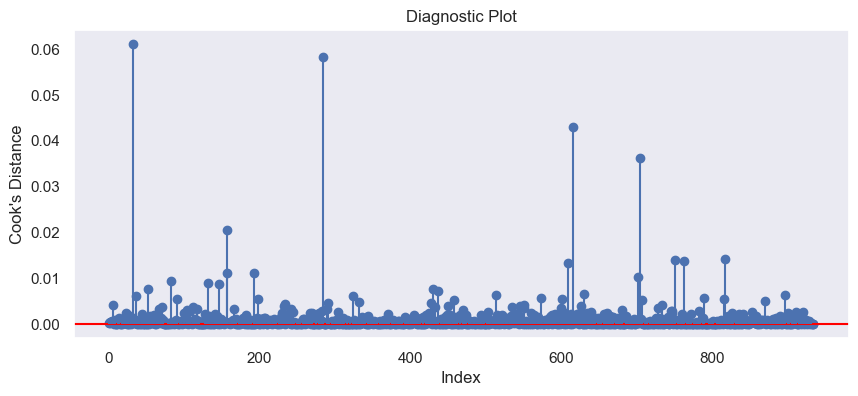

In [134]:
plt.figure(figsize = (10,4))
plt.scatter(df_hetro.index, cooks_distance[0])
plt.axhline(0, color= 'red')
plt.vlines(x = df_hetro.index, ymin = 0,ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic Plot')
plt.grid()

### Points above the threshold line(4/n) may have a significant impact on the regression coefficients.The points with unusually high Cook's distances may be influential outliers. There are a few unusual observations in the above plot.

# Residuals Plot

In [135]:
residuals = model_final.resid

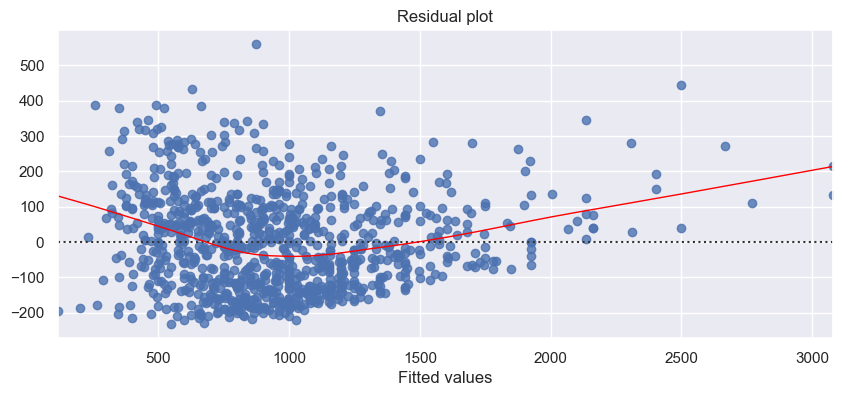

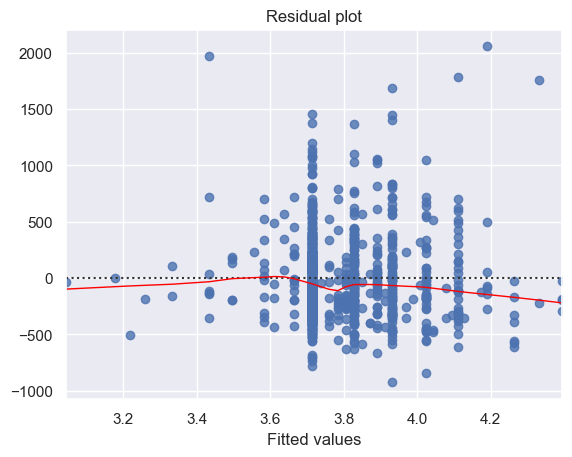

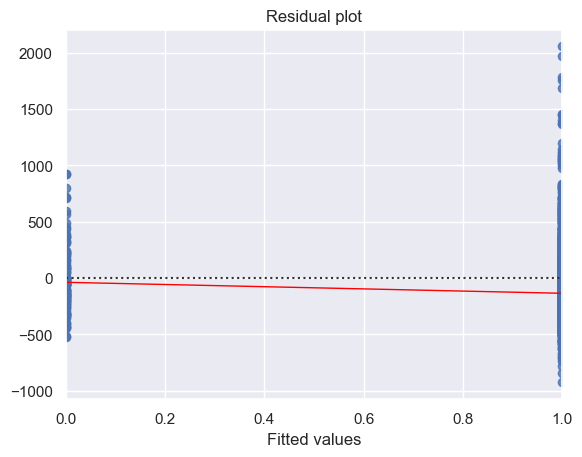

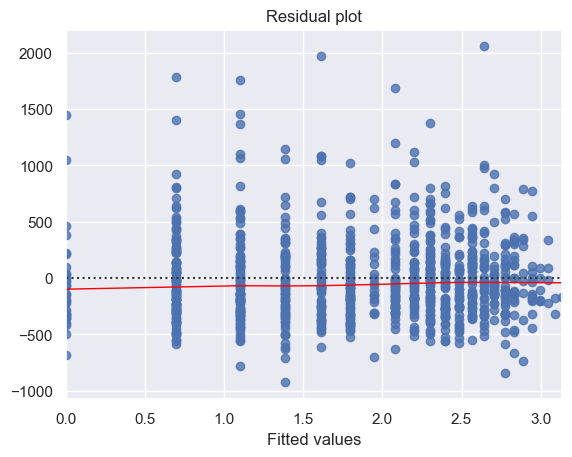

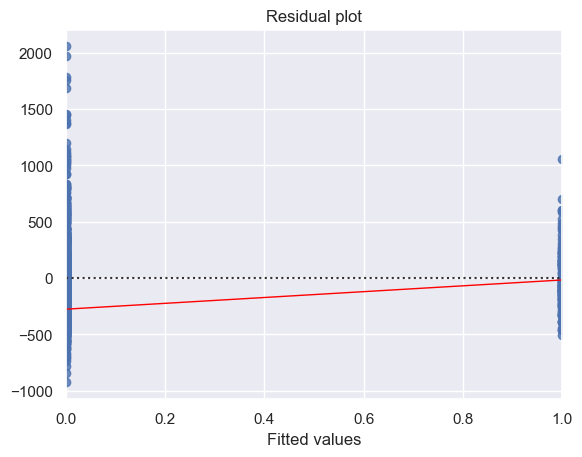

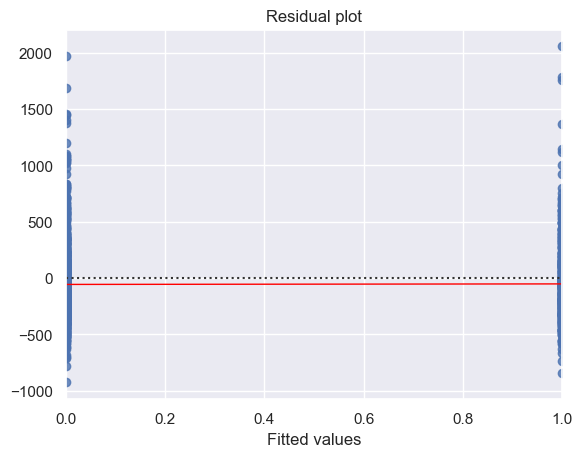

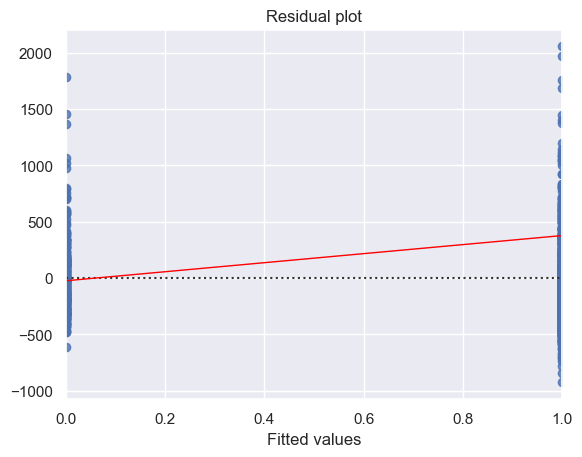

In [136]:
plt.figure(figsize=(10, 4))
for col in df_hetro.columns:
    
    sns.residplot(x=df_hetro[col], y=model_final.resid, lowess=True,
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
    plt.xlabel("Fitted values")
    plt.title('Residual plot')
    plt.show()

# QQ Plot

In [ ]:
#Plotting QQ Plots for each variable

selected_cols = df_hetro[['wage','transformed_hours','transformed_married', 'transformed_tenure','transformed_black','transformed_south','transformed_urban']]

# Create a figure with subplots for QQ plots
qqplot = len(selected_cols)
fig, axes = plt.subplots(4,2 , figsize=(18,24))
axes = axes.ravel()


#Step 1: Creating qq plot for each variable in the selected_columns list by using for function:
for x, y in enumerate(selected_cols):
    ax = axes[x]
    data = selected_cols[y]

    # Create a QQ plot for the variable
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(f'QQ Plot for {y}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

#Plot qq plots for each variable
plt.tight_layout()
plt.show()

#  Bootstrapping our model

In [152]:
ols_mod = smf.ols('wage ~ transformed_hours + transformed_married+ transformed_tenure + transformed_black + transformed_south + transformed_urban', df_hetro).fit()

ols_mod.params

Intercept              975.186417
transformed_hours      -96.764734
transformed_married    169.053941
transformed_tenure      62.797376
transformed_black     -232.411483
transformed_south      -75.297269
transformed_urban      191.299396
dtype: float64

In [ ]:

ols_mod = smf.ols('wage ~ transformed_hours + transformed_married+ transformed_tenure + transformed_black + transformed_south + transformed_urban', df_hetro).fit()


boot_slopes1 = []
boot_slopes2 = []
boot_slopes3 = []
boot_slopes4 = []
boot_slopes5 = []
boot_slopes6 = []
boot_interc = []
boot_adjR2 = []

n_boots = 100
n_points = df_hetro.shape[0]

plt.figure()

for _ in range(n_boots):

    sample_df = df_hetro.sample(n=n_points, replace=True)
    

    ols_model_temp = smf.ols('wage ~ transformed_hours + transformed_married+ transformed_tenure + transformed_black + transformed_south + transformed_urban', sample_df)
    results_temp = ols_model_temp.fit()


    boot_interc.append(results_temp.params[0])
    boot_slopes1.append(results_temp.params[1])
    boot_slopes2.append(results_temp.params[2])
    boot_slopes3.append(results_temp.params[3])
    boot_slopes4.append(results_temp.params[4])
    boot_slopes5.append(results_temp.params[5])
    boot_slopes6.append(results_temp.params[6])
    boot_adjR2.append(results_temp.rsquared_adj)


    #y_pred_temp = results_temp.predict(sm.add_constant(sample_df[['transformed_hours','transformed_married', 'transformed_tenure' ,'transformed_black','transformed_south' ,'transformed_urban']]))
    #plt.plot(sample_df['transformed_hours','transformed_married', 'transformed_tenure' ,'transformed_black','transformed_south' ,'transformed_urban'], y_pred_temp, color='grey', alpha=0.2)
    y_pred = ols_mod.predict(sm.add_constant(df_hetro[['transformed_hours', 'transformed_married', 'transformed_tenure', 'transformed_black', 'transformed_south', 'transformed_urban']]))
    plt.scatter(df_hetro[['transformed_hours', 'transformed_married', 'transformed_tenure', 'transformed_black', 'transformed_south', 'transformed_urban']], df_hetro['wage'])
    plt.plot(sample_df[['transformed_hours', 'transformed_married', 'transformed_tenure', 'transformed_black', 'transformed_south', 'transformed_urban']], y_pred, linewidth=2, color='red')


y_pred = ols_mod.predict(sm.add_constant(df_hetro['transformed_hours','transformed_married', 'transformed_tenure' ,'transformed_black','transformed_south' ,'transformed_urban']))
plt.scatter(df_hetro['transformed_hours','transformed_married', 'transformed_tenure' ,'transformed_black','transformed_south' ,'transformed_urban'], df_hetro['wage'])
plt.plot(data['transformed_hours','transformed_married', 'transformed_tenure' ,'transformed_black','transformed_south' ,'transformed_urban'], y_pred, linewidth=2, color='red')
plt.grid(True)
plt.xlabel('transformed_hours','transformed_married', 'transformed_tenure' ,'transformed_black','transformed_south' ,'transformed_urban')
plt.ylabel('wage')
plt.title('wage vs ')
plt.show()



### Analysis of Bootstrapping

The statistic of the bootstrap sample is an estimate of the population parameter.

Bootstrapping helps us see that the bootstrapped estimate for adjusted R Squared is closer to the Lease Squares estimate. The other estimates are not close to the Least Squares estimate.


# Cross Validation

In [138]:
x = df_hetro[['transformed_hours','transformed_married', 'transformed_tenure' ,'transformed_black','transformed_south' ,'transformed_urban']]
y = df_hetro[['wage']]

regr = LinearRegression()
model = regr.fit(x,y)
regr.coef_
regr.intercept_


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


regr = LinearRegression()
regr.fit(x_train, y_train)


y_pred = regr.predict(x_test)



print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV RMSE Scores:', scores)

MAE: 250.58365061970238
MSE: 117045.16735759155
RMSE: 342.1186451475446
5-Fold CV RMSE Scores: [-429.52912433 -381.29935143 -352.93020114 -418.91992349 -319.49977921]


By comparing the true values to the predicted values, we have a measure of how well the model predicted the correct values. Each time, one of the folds is used as the test set, while the other 19 folds are used for training.
IT Overfits.


# Marginal effects

In [144]:
model_final.params

const                  975.186417
transformed_hours      -96.764734
transformed_married    169.053941
transformed_tenure      62.797376
transformed_black     -232.411483
transformed_south      -75.297269
transformed_urban      191.299396
dtype: float64

In [149]:
print("ME for model_final:")
for i, col in enumerate(model_final.params.index):
    print(f"{col}: {model_final.params[i]}")


ME for model_final:
const: 975.1864174817414
transformed_hours: -96.76473407380975
transformed_married: 169.0539408213076
transformed_tenure: 62.79737629220491
transformed_black: -232.41148251347968
transformed_south: -75.29726904678245
transformed_urban: 191.2993959934775


const (Intercept): This represents the estimated wage when all other variables are zero. In our case, it's 975.1864.

Transformed_hours: A one-unit increase in transformed_hours is associated with a decrease of approximately 96.76 in wage, holding other variables constant.

Transformed_married: Being married (transformed_married) is associated with an increase of approximately 169.05 in wage, holding other variables constant.

Transformed_tenure: A one-unit increase in transformed_tenure is associated with an increase of approximately 62.80 in wage, holding other variables constant.

Transformed_black: Being black (transformed_black) is associated with a decrease of approximately 232.41 in wage, holding other variables constant.

Transformed_south: Being in the south (transformed_south) is associated with a decrease of approximately 75.30 in wage, holding other variables constant.

Transformed_urban: Being in an urban area (transformed_urban) is associated with an increase of approximately 191.30 in wage, holding other variables constant.

These values tell us how each independent variable affects the dependent variable while controlling for the effects of the other variables in the model. Negative values indicate a decrease in the dependent variable, while positive values indicate an increase, all else being equal.

### Interpreting the model parameters and discussing economic insights:

### We have a linear regression model of the form:

### wage= β0+ β1⋅transformed_hours+ β2⋅transformed_married+ β3⋅transformed_tenure+ β4⋅transformed_black+ β5⋅transformed_south+ β6⋅transformed_urban+ϵ

Here, β0,β1,…,β6 are the coefficients of the model, and ϵϵ is the error term.

Intercept (β0):
    The intercept represents the estimated wage when all predictor variables are zero. 

Transformed Hours (β1):
    The coefficient for transformed_hours represents the estimated change in wage for a one-unit increase in hours, holding other variables constant. It is positive in our model, suggesting that as the number of hours increases, the wage tends to increase, assuming other variables are constant.

Transformed Married (β2):
    The coefficient for transformed_married represents the estimated change in wage associated with being married (compared to not being married), holding other variables constant. It is positive in our model.

Transformed Tenure (β3):
    The coefficient for transformed_tenure represents the estimated change in wage for a one-unit increase in tenure, assuming other variables are constant. It represents the effect of years of tenure on wages. It is positive in our model, suggesting that as the number of years increases, the wage tends to increase, assuming other variables are constant.


Transformed Black (β4):
    The coefficient for transformed_black represents the estimated change in wage associated with being black (compared to not being black), holding other variables constant. It is negative in our model.

Transformed South (β5):
    The coefficient for transformed_south represents the estimated change in wage associated with being in the South (compared to not being in the South), holding other variables constant. It is negative in our model.

Transformed Urban (β6):
    The coefficient for transformed_urban represents the estimated change in wage associated with living in an urban area (compared to not living in an urban area), holding other variables constant. It is positive in our model.

Note that the interpretation of coefficients is based on the data, economic interpretations(theories) and the transformations applied. Additionally, the statistical significance and the magnitude of the coefficients.


### We have finalised this model after running various tests and comparing the results. (r-squared value, multicollinearity, Cook’s distance Plot, Residuals Plot, QQ-Plot, AIC, BIC, etc).

### All the selected parameters are economically significant. In our initial model, we found that there are collinearities among variables, so resolved that. We also imputed the NAs. From the Boruta test, we selected the important predictors. Couldn't resolve the issue of eteroskedasticity after adopting the WLS method.
